## Final Project Submission

Please fill out:
* Student name: Oliver Zimmer
* Student pace: self paced
* Scheduled project review date/time: 8th February 2022
* Instructor name: Matt Carr
* Blog post URL:


### Project Overview & Methodology

This is the end of Project 2 challenge of the Flatiron School Online Data Science course. The task at hand is applying the regression techniques learned in this section to a real estate dataset.

The business stakeholder for this project is a real estate agency requiring investigation into the house sales of the King County area (a northwestern county of the US) with the ultimate aim of reliably predicting sales prices.

While the aim of the stakeholder can be multifold, it is likely to assume that the results will be used for advertising or providing future customers with reliable estimates of future prices for residential properties.

For this exercise I will explore a provided dataset, perform any adjustments and data cleaning necessary and finally build statistical models for price prediction.

The **Data Science process** followed for this project will be the **OSEMN** process (**O**btain, **S**crub, **E**xplore, **M**odel, i**N**terpret), sometimes also referred to as *OSEMiN*.

### Data base

The dataset provided is the King County House Sales dataset. Column *names* and *descriptions of their content* are provided the **column_names.md** file in the data forlder of this repository.

#### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Importing the necessary Python libraries and modules

The following javascript command disables output windows to appear in scrollable frames.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import the necessary libraries and modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols

import scipy.stats as stats

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import pickle

### Obtain

The first step in the OSEMN approach is simply importing the necessary data. I will also take a first quick glance at what I am dealing with.

In [3]:
# Load in CSV datafile
data = pd.read_csv('data/kc_house_data.csv')

In [4]:
display(data.head(10))
display(len(data))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


21597

The 21 previously defined columns result in 21.597 entries of the King County's dataset.

### Scrub

This step involves cleaning the data to ensure it is viable for exploratory data analysis (EDA) and model building (i.e. deal with missing values, check data types and make corrections where necessary).

In [5]:
# Summarize the data to check for data types and null values at a glance
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Missing values

While apparently none of the variables showcase null values, we might be dealing with missing values that should be taken care of.

In [6]:
# Check for missing values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The features *Waterfront* (categorical feature), *view* and *yr_renovated* showcase missing values that need to be dealt with.

In [7]:
# Take a closer look at variables with missing values to determine how they could be dealt with
data[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,19221.000000,21534.000000,17755.000000
mean,0.007596,0.233863,83.636778
std,0.086825,0.765686,399.946414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


Upon examining the detailed statistics for all three features, especially the interquartile range, replacing missing values with *zero* seems the most rational approach.

In [8]:
# Replace missing values with zeroes and perform check
data = data.fillna(0)
data.isna().any().any()

False

All missing values have been replaced.

### Data types

Two variables whose data types immediately caught my attention are **Date** (which ought to be a *DateTime* object to allow to be worked with  effectively) and **sqft_basement** which ought to be a *float* data type just like the other square feet variables.

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
556.0         1
2810.0        1
1920.0        1
792.0         1
588.0         1
Name: sqft_basement, Length: 304, dtype: int64

No basement (i.e. **0**) is the most common occurence across the data, followed by **?**. I will replace the ?s with the data's **mode**.

In [11]:
data['sqft_basement'] = data['sqft_basement'].map(lambda x : float(x.replace('?', '0')))
data['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

**Data Types** have been dealt with and corrected where necessary.

### Duplicates

In [13]:
duplicates = data[data.duplicated()]
display(len(duplicates))
duplicates = data[data.duplicated(subset=['id'])]
display(len(duplicates))

0

177

While no two rows are exactly the same, the **id** column (i.e. the unique identifier for a house) does show duplicate values, indicating that the same house has been sold several times. As it serves no purpose for this data analysis, I will remove the feature from the DataFrame.

In [14]:
data = data.drop(['id'], axis = 1)

### In-depth Predictor Analysis & Feature Engineering

Next I will take a closer look at the following predictors and perform engineering where necessary/sensible for future analyses:

* renovations
* year built
* sqft_basement
* view
* bathrooms
* grade

### Renovations

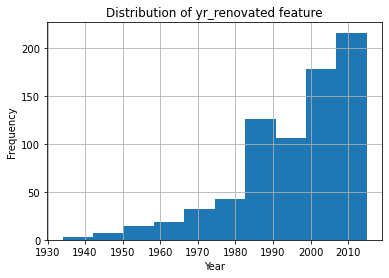

In [15]:
data[data['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of yr_renovated feature")
plt.show()

As was to be assumed, frequency of renovations increased as time progressed. Interestingly, there is a **strong jump between the 1980s and 1990s**, followed by an increase and again another **significant jump around the turn of the millenium**.

I choose to **only analyze renovations beyond 1980**, since earlier renovations might be obsolete. As a side note, in my home country Germany, houses built in the 70s often contain poisonous materials and substances such as *asbestos* or *formaldehyde*. While it cannot be assumed per se that this is the case for the US hosuing market in general or houses in the King County area specifically, it could for once nevertheless be a factor and also render the model applicable for use in different housing markets. 

In [16]:
data['renovations_post1980'] = data['yr_renovated'].map(lambda x: 1 if x > 1980 else 0)
data = data.drop('yr_renovated', axis = 1)

### Year Built

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

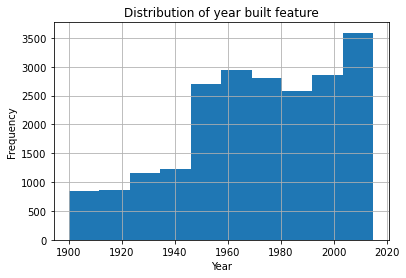

In [17]:
display(data['yr_built'].describe())
data['yr_built'].hist()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of year built feature')
plt.show()

There is a large increase in houses being built around the 1950s. For the sake of efficient data analysis (as there is no added value from single year analysis), I will group this feature into chunks according to the quartiles (with the exception of summarizing everything before 1950).

In [18]:
def year_built(data):
    year_built_bins = [1899, 1950, 1975, 1997, 2016] # Determined by quartiles
    year_built_labels = ['pre_1950', '1950-1975', '1975-2000', '2000-2015']
    data['yr_built'] = pd.cut(data['yr_built'], bins = year_built_bins, labels = year_built_labels)
    
    return data

In [19]:
data = year_built(data)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  21597 non-null  datetime64[ns]
 1   price                 21597 non-null  float64       
 2   bedrooms              21597 non-null  int64         
 3   bathrooms             21597 non-null  float64       
 4   sqft_living           21597 non-null  int64         
 5   sqft_lot              21597 non-null  int64         
 6   floors                21597 non-null  float64       
 7   waterfront            21597 non-null  float64       
 8   view                  21597 non-null  float64       
 9   condition             21597 non-null  int64         
 10  grade                 21597 non-null  int64         
 11  sqft_above            21597 non-null  int64         
 12  sqft_basement         21597 non-null  float64       
 13  yr_built        

The yr_built feature has been successfully transformed into a category data type and the resulting Searborne countplot provides compressed information.

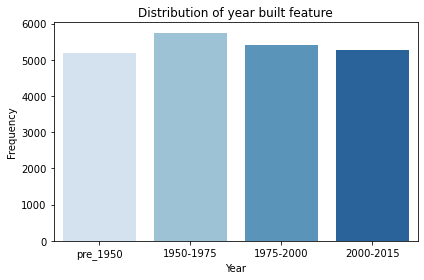

In [21]:
sns.countplot(x = data['yr_built'], data = data, order=['pre_1950', '1950-1975', '1975-2000', '2000-2015'], palette='Blues')
plt.title('Distribution of year built feature')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()

### Sqft Basement

Not all houses do have basements, therefore I will begin by analyzing which houses have basements by creating a categorical feature (1 for basement in case there are square feet provided, 0 for no basement).

In [22]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovations_post1980
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1950-1975,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1950-1975,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,pre_1950,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1950-1975,98136,47.5208,-122.393,1360,5000,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1975-2000,98074,47.6168,-122.045,1800,7503,0


In [23]:
data['with_basement'] = data['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

In [24]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovations_post1980,with_basement
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1950-1975,98178,47.5112,-122.257,1340,5650,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1950-1975,98125,47.7210,-122.319,1690,7639,1,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,pre_1950,98028,47.7379,-122.233,2720,8062,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1950-1975,98136,47.5208,-122.393,1360,5000,0,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1975-2000,98074,47.6168,-122.045,1800,7503,0,0


### Bathrooms

In [25]:
display(data['bathrooms'].describe())
display(data['bathrooms'].unique())

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Min-Max ranges from 0.5 to 8. While 8 in fact indicates 8 bathrooms, floats indicates a toilet but no shower. To simplify analysis I will round this to the nearest integer.

In [26]:
data['bathrooms'] = data['bathrooms'].map(lambda x: int(round(x,0)))
display(data.head())
display(data['bathrooms'].unique())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovations_post1980,with_basement
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1950-1975,98178,47.5112,-122.257,1340,5650,0,0
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1950-1975,98125,47.7210,-122.319,1690,7639,1,1
2,2015-02-25,180000.0,2,1,770,10000,1.0,0.0,0.0,3,...,770,0.0,pre_1950,98028,47.7379,-122.233,2720,8062,0,0
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1950-1975,98136,47.5208,-122.393,1360,5000,0,1
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1975-2000,98074,47.6168,-122.045,1800,7503,0,0


array([1, 2, 3, 4, 5, 6, 0, 7, 8], dtype=int64)

### View

In [27]:
data['view'].describe()

count    21597.000000
mean         0.233181
std          0.764673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

Since majority entries of the 'view' feature is zero (i.e. not viewed), I will simplify this variable by turning it into a binary one: 0 for not viewed, 1 for viewed.

In [28]:
data['viewed'] = data['view'].map(lambda x: 1 if x > 0 else 0)
data = data.drop('view', axis = 1)

### Outliers
To potentially catch outliers, I will create a histogram overview of all features.

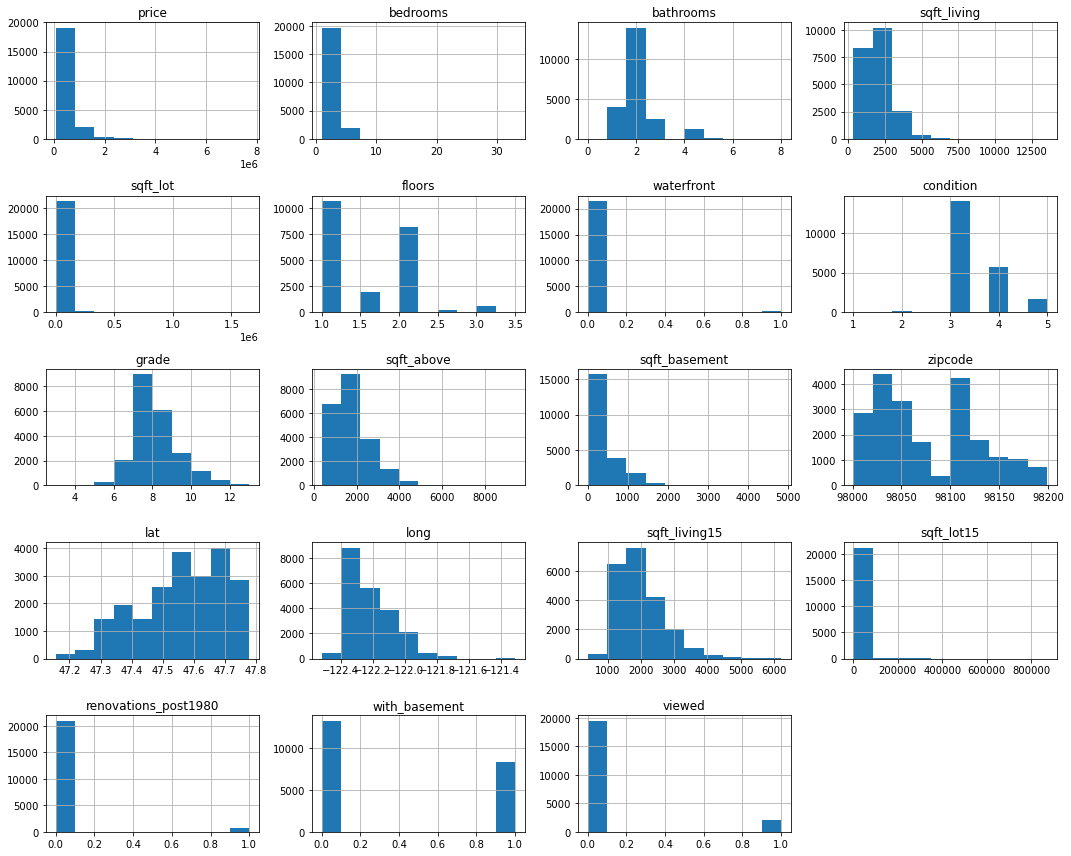

In [29]:
data.hist(figsize = (15,12))
plt.ticklabel_format(style='plain')
plt.tight_layout()

Rather than investigating outliers individually, however, I will employ a general approach by choosing to define outliers as values that are three standard deviations above or below the mean. By eliminating all values with a z-score above 3 or below -3, I will cover 99% of the distribution while avoiding very unusual data points that could potentially distort the analysis.

I do not need to include binary features such as waterfront or discrete predictors like floors. **Price** deserves individual consideration, since it is our **target variable** that I ultimately want to predict.

In [30]:
original = len(data)
original

21597

In [31]:
def eliminate_outliers(data):
    features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for feature in features:
        data = data[np.abs(data[feature]-data[feature].mean()) <= (3*data[feature].std())]
        
    return data

In [32]:
data = eliminate_outliers(data)

In [33]:
without_outliers = len(data)
display(without_outliers)
print(round((original-without_outliers)/original*100,2),"%")

20055

7.14 %


7.14% of potentially distorting data has been successfully eliminated.

###  Price (Target Variable)

In [34]:
data['price'].describe().round(2)

count      20055.00
mean      506053.50
std       281535.73
min        78000.00
25%       316000.00
50%       440000.00
75%       620000.00
max      3300000.00
Name: price, dtype: float64

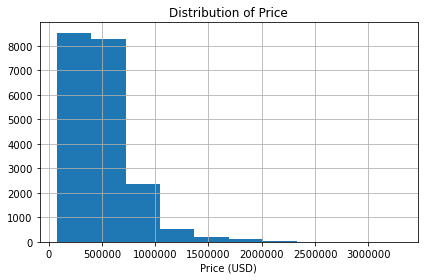

In [35]:
data['price'].hist()
plt.xlabel('Price (USD)')
plt.title('Distribution of Price')
plt.ticklabel_format(style='plain')
plt.tight_layout()

In [36]:
for i in range (75,100):
    q = i/100
    quantile = data['price'].quantile(q = q)
    print(f"{q} percentile: {round(quantile,3)}")

0.75 percentile: 620000.0
0.76 percentile: 629000.0
0.77 percentile: 640000.0
0.78 percentile: 650000.0
0.79 percentile: 660000.0
0.8 percentile: 673000.0
0.81 percentile: 685000.0
0.82 percentile: 699000.0
0.83 percentile: 710000.0
0.84 percentile: 725000.0
0.85 percentile: 739900.0
0.86 percentile: 751000.0
0.87 percentile: 770000.0
0.88 percentile: 787260.0
0.89 percentile: 805000.0
0.9 percentile: 825900.0
0.91 percentile: 850000.0
0.92 percentile: 875000.0
0.93 percentile: 905000.0
0.94 percentile: 945608.0
0.95 percentile: 990730.0
0.96 percentile: 1080000.0
0.97 percentile: 1200000.0
0.98 percentile: 1330000.0
0.99 percentile: 1580000.0


While the max price of houses is at 3.3m USD, 99% of the King County housing data encompasses prices up to 158,000 USD. As prices beyond are therefore likely to present vastly features that are worthy of a different approach and analysis, I will eliminate those for the sake of this analysis. 

In [37]:
data = data[data['price']<=1590000]

### Location
As the old adage in real estate goes **"Location, location, location"**, even to the non-real estate afficionados it is known that location is one of the single most important aspects determining the price of a house, aparment or other types of real estate.

To start, I will create a copy of the DataFrame to test and explore assumptions and analyses regarding location.

In [38]:
data_location = data.copy()

The zipcodes of real estate deals in the King County area have been provided in the dataset.

In [39]:
data_location['zipcode'].value_counts()

98103    598
98115    578
98052    555
98117    550
98038    526
        ... 
98070     65
98148     57
98024     40
98039     16
98045      1
Name: zipcode, Length: 70, dtype: int64

There are 70 different zipcodes in the dataset. I will determine the median price per zipcode (using the average could lead to distorted results due to outliers).

In [40]:
data_price_loc = data_location[['zipcode', 'price']]
data_price_loc = data_price_loc.groupby(data_price_loc['zipcode']).median().reset_index()
data_price_loc['zipcode'] = data_price_loc['zipcode'].astype(str)

data_price_loc.head()

,zipcode,price
0,98001,259900.0
1,98002,235000.0
2,98003,265000.0
3,98004,925000.0
4,98005,740000.0


Sorting **prices by location** provides a good indicator of what kind of **price range can be expected in which areas**, thereby enabling to more adequately channel marketing efforts and expectations in the right direction.

In [41]:
data_top = data_location.sort_values('price', ascending = False)[:10]
data_top

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovations_post1980,with_basement,viewed
8531,2015-01-16,1590000.0,4,2,3240,11131,1.0,0.0,4,9,...,1160.0,1950-1975,98004,47.6182,-122.215,2300,12150,0,1,0
20128,2014-10-28,1580000.0,3,2,3620,14250,2.0,0.0,3,8,...,400.0,2000-2015,98040,47.5767,-122.225,2370,14250,0,1,0
3522,2014-05-12,1580000.0,5,3,3650,20150,1.0,0.0,4,10,...,1290.0,1950-1975,98004,47.6215,-122.224,3220,19800,0,1,0
15058,2015-05-08,1580000.0,4,3,3480,19991,2.0,0.0,4,10,...,850.0,1975-2000,98004,47.6354,-122.214,3770,20271,0,1,1
6392,2015-03-17,1580000.0,4,3,3120,20031,1.0,0.0,4,9,...,1140.0,1950-1975,98040,47.5389,-122.242,3330,18777,0,1,1
6956,2014-05-21,1580000.0,3,3,3690,7200,2.0,0.0,3,11,...,0.0,2000-2015,98033,47.6815,-122.200,1880,7200,0,0,0
14339,2014-05-06,1580000.0,4,3,3760,10920,1.5,0.0,5,9,...,1360.0,pre_1950,98105,47.6687,-122.264,3430,11050,0,1,0
3817,2014-09-05,1580000.0,5,4,4220,9240,2.0,0.0,5,11,...,800.0,1975-2000,98040,47.5895,-122.229,3380,9240,0,1,1
10828,2014-11-17,1580000.0,3,3,2610,22672,1.5,1.0,4,8,...,0.0,1950-1975,98166,47.4414,-122.354,2810,22672,0,0,1
13386,2015-03-27,1580000.0,4,2,2900,10500,1.0,0.0,5,8,...,1450.0,1950-1975,98040,47.5838,-122.246,2900,9201,0,1,1


In [42]:
data_low = data_location.sort_values('price', ascending = True)[:10]
data_low

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovations_post1980,with_basement,viewed
15279,2014-05-06,78000.0,2,1,780,16344,1.0,0.0,1,5,...,0.0,pre_1950,98168,47.4739,-122.280,1700,10387,0,0,0
465,2014-05-23,80000.0,1,1,430,5050,1.0,0.0,2,4,...,0.0,pre_1950,98014,47.6499,-121.909,1200,7500,0,0,0
16184,2015-03-24,81000.0,2,1,730,9975,1.0,0.0,1,5,...,0.0,pre_1950,98168,47.4808,-122.315,860,9000,0,0,0
8267,2014-11-05,82000.0,3,1,860,10426,1.0,0.0,3,6,...,0.0,1950-1975,98146,47.4987,-122.341,1140,11250,0,0,0
2139,2014-05-08,82500.0,2,1,520,22334,1.0,0.0,2,5,...,0.0,1950-1975,98168,47.4799,-122.296,1572,10570,0,0,0
18453,2014-05-29,83000.0,2,1,900,8580,1.0,0.0,3,5,...,0.0,pre_1950,98168,47.4727,-122.270,2060,6533,0,0,0
3763,2015-04-30,84000.0,2,1,700,20130,1.0,0.0,3,6,...,0.0,pre_1950,98168,47.4752,-122.271,1490,18630,0,0,0
10242,2014-09-15,85000.0,2,1,830,9000,1.0,0.0,3,6,...,0.0,pre_1950,98032,47.3813,-122.243,1160,7680,0,0,0
16700,2015-03-05,85000.0,2,1,910,9753,1.0,0.0,3,5,...,0.0,pre_1950,98032,47.3897,-122.236,1160,7405,0,0,0
13743,2014-07-22,86500.0,3,1,840,9480,1.0,0.0,3,6,...,0.0,1950-1975,98023,47.3277,-122.341,840,9420,0,0,0


Sorting price by zipcodes provides a sense of which prices could be expected in which area of the King County area, a useful overview to quickly gauge housing prices.

### Time
As a second factor, I will analyze possible effects that timing has on sales prices. Questions that I intend to answer are for instance **Is there any correlation between house prices and time of sale?** or **When is the best/worst time to sell a house?**

Again, I will start by creating a separate DataFrame for my analyses.

In [43]:
data_time = data.copy()

From the provided date column I extract the month.

In [44]:
# Creating and applying the new column for time analyses
data['month'] = pd.DatetimeIndex(data['date']).month
data_time['month'] = data['month']

I will use this new feature for quarterly as well as monthly analyses.

In [45]:
def quarter(month):
    if 1 <= month <= 3:
        quarter = 'Q1'
    elif 4 <= month <= 6:
        quarter = 'Q2'
    elif 7 <= month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return quarter

In [46]:
def quarter_fn(df):
    data['quarter'] = data['month'].apply(quarter)
    return data

In [47]:
data_time = quarter_fn(data_time)

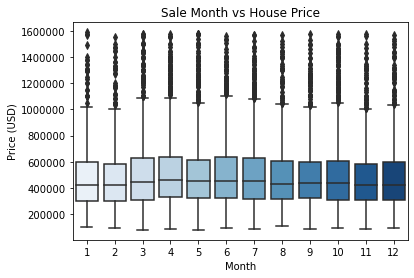

In [48]:
# Boxplot sale month vs house price
sns.boxplot(x = data_time['month'], y = data_time['price'], data = data_time, palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.title('Sale Month vs House Price')
plt.show()

In [49]:
data_time_median_month = data_time.groupby('month')['price'].median()
data_time_median_month

month
1     419000.0
2     420000.0
3     441000.0
4     461000.0
5     450000.0
6     452500.0
7     450000.0
8     427520.0
9     438200.0
10    435000.0
11    425000.0
12    421000.0
Name: price, dtype: float64

There is a small **peak in median house prices in April**, while the remaining months show a rather equal prices, the winter months November through January being slightly below the rest.

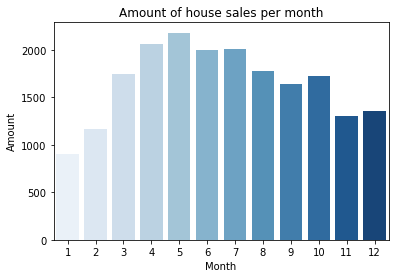

In [50]:
# Frequency of sales by month
sns.countplot(x = data_time['month'], data = data_time, palette='Blues')
plt.title('Amount of house sales per month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

The frequency of house sales is **lowest during the winter months** and **peaks in spring**.

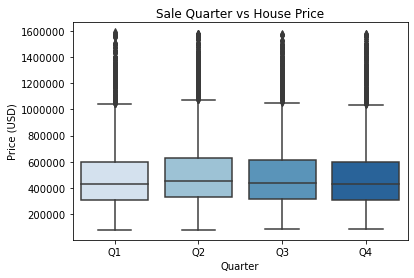

In [51]:
# Boxplot sale quarter vs house price
sns.boxplot(x = data_time['quarter'], y = data_time['price'], data = data_time, order = ['Q1','Q2','Q3','Q4'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Quarter')
plt.ylabel('Price (USD)')
plt.title('Sale Quarter vs House Price')
plt.show()

No suprises here, the second quarter (incl. April with the highest median sales prices across the year) is slightly above the other quarters in terms of median sales price.

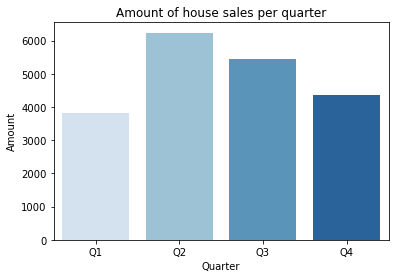

In [52]:
# Frequency of sales by quarter
sns.countplot(x = data_time['quarter'], data = data_time, order = ['Q1','Q2','Q3','Q4'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Amount of house sales per quarter')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.show()

As expected, the second quarter (spring) features the highest amounts of sales, as peaks have been shown to occur in May.

In [53]:
data_time_median_quarter = data_time.groupby('quarter')['price'].median()
data_time_median_quarter

quarter
Q1    428825.0
Q2    453500.0
Q3    439250.0
Q4    426825.0
Name: price, dtype: float64

In [54]:
data_time['quarter'].value_counts()/len(data_time)

Q2    0.314130
Q3    0.273643
Q4    0.220365
Q1    0.191862
Name: quarter, dtype: float64

About 31% of sales occur during the second quarter, followed by Q3 at about 27%, Q1 being the quarter of lowest house sales at 19% 

Month and quarter render the *date* column of the original dataset redundant and will be dropped.

In [55]:
data = data.drop(['date'], axis = 1)

### Real Estate Attributes - Categorical Values
In the next step I will look at the effects of the following categorical housing attributes on price:
- Year Built
- Renovations (post 1980)
- Number of Bedrooms
- Number of Bathrooms
- Does it have a Basement?
- Number of Floors
- View
- Grade
- Condition

I will start again by creating a copy of the original DataSet for my analyses.

In [56]:
data_attr = data.copy()

#### Year Built

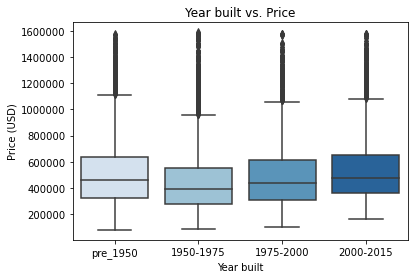

In [57]:
sns.boxplot(x = data_attr['yr_built'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Year built vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('Year built')
plt.show()

After a dip in median sales price between 1950 and 1975, prices slowly recover until the first one and a half decade of the millenium.

#### Renovations

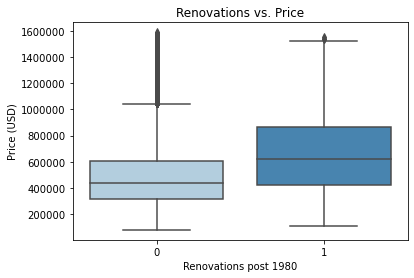

In [58]:
sns.boxplot(x = data_attr['renovations_post1980'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Renovations vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('Renovations post 1980')
plt.show()

Renovations after 1980 raise the median sales price by rougly 200kUSD.

#### Basement

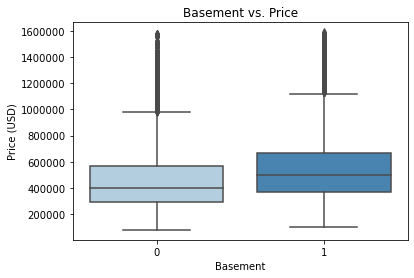

In [59]:
sns.boxplot(x = data_attr['with_basement'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Basement vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('Basement')
plt.show()

Houses with basements sell at a premium to their non-basement peers.

#### Bedrooms

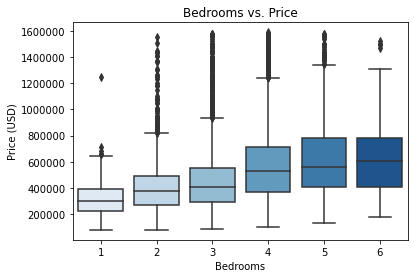

In [60]:
sns.boxplot(x = data_attr['bedrooms'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Bedrooms vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('Bedrooms')
plt.show()

The count of bedrooms shows a positive correlation with price, albeit quite many outliers between 2 and 5 bedrooms.

#### Bathrooms

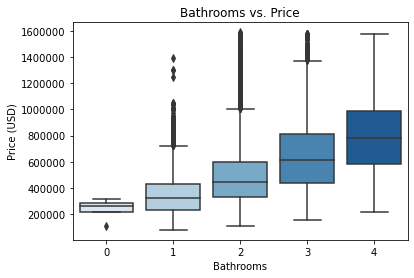

In [61]:
sns.boxplot(x = data_attr['bathrooms'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Bathrooms vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('Bathrooms')
plt.show()

As the comfort of a home increases with its number of bathrooms, so does the selling price.

#### Floors

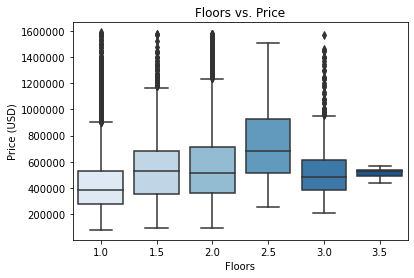

In [62]:
sns.boxplot(x = data_attr['floors'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Floors vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('Floors')
plt.show()

More floors are favorable in terms of price, but only until 2.5 floors, after which the effects resembles that of 1.5 and 2 floors.

#### View

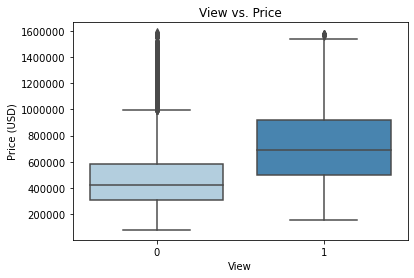

In [63]:
sns.boxplot(x = data_attr['viewed'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('View vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('View')
plt.show()

Whether or not a house has been previously viewed appears to have a substantial impact on selling prices, which are raised by approx. 350kUSD.

#### Grade

Building grade is a feature from [King County government](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b) and represents the *construction quality of improvements*.

* 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
* 4 Generally older, low quality construction. Does not meet code.
* 5 Low construction costs and workmanship. Small, simple design.
* 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
* 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
* 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* 9 Better architectural design with extra interior and exterior design and quality.
* 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
* 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
* 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
* 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

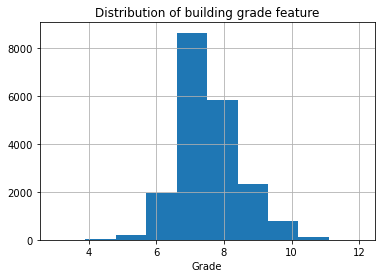

In [64]:
data['grade'].describe()
data['grade'].hist()
plt.title('Distribution of building grade feature')
plt.xlabel('Grade')
plt.show()

The Grade feature follows a normal distribution. Most houses are a seven in terms of quality.

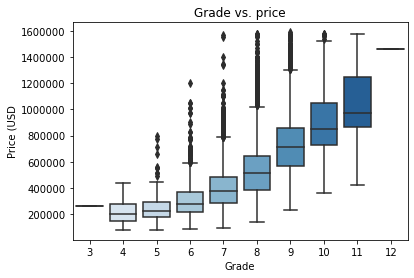

In [65]:
sns.boxplot(x = data['grade'], y = data['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Grade vs. price')
plt.ylabel('Price (USD')
plt.xlabel('Grade')
plt.show()

By definition, grade ought to be a good indicator of house price. This shown by the positive correlation, price increases with price. While there are no custom built houses, the custom design and excellent built of grade 12 houses significantly increases median selling prices.

#### Condition

According to the aforementioned [website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b), condition, coded 1-5 is relative to age and grade.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

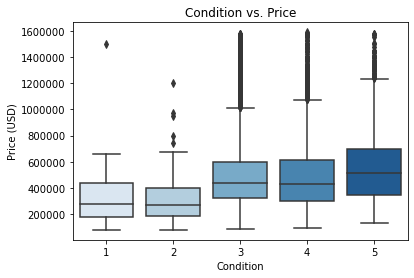

In [66]:
sns.boxplot(x = data_attr['condition'], y = data_attr['price'], palette='Blues')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Condition vs. Price')
plt.ylabel("Price (USD)")
plt.xlabel('Condition')
plt.show()

We see a comparable development as to grade, with the exception that a larger jump can be witnessed between conditions 2 and 3, while 3 and 4 are virtually identical.

### Model
After all these preparatory steps I am getting to the meat of our analysis, by building models to predict house prices. How reliable those predictions are will become apparent from the regression results.

These models employed will be linear regression models (single or multivariable), using **ordinary least squares** as regression technique. In order to get reliable results from the models, the following assumptions of the underlying data must be fulfilled *(there are other assumptions for more complicated cases, which I do not cover here)*:

- **Linearity** (the change in Y by 1-unit change in X, is constant)
- **Normality** (the model residuals should follow a normal distribution)
- **Homoscedasticity** (the dependent variable's variability is equal across values of the independent variable)

While I will analyze for homoscedasticity and the residual's distribution after each model run, I check for linearity/normality and mutlicollinearity in (some of) the underlying data beforehand.

#### Linearity/Normality of the underlying features
Since one of the prerequisites for linear regression is linearity of its parameters, I will first inspect linearity and distributions of the dataset's continuous features using Seaborn's jointplot function and perform loglinear transformations if necessary.

In order to simultaneously see how a lognormal transformation might improve a feature's applicability for OLS, I will create a side-by-side comparison.

In [67]:
# Create new DataFrame
data_norm = pd.DataFrame([])

# Lognormal Transformation
data_norm['log_sqft_living'] = np.log(data['sqft_living'])
data_norm['log_sqft_lot'] = np.log(data['sqft_lot'])
data_norm['log_sqft_above'] = np.log(data['sqft_above'])
data_norm['log_sqft_living15'] = np.log(data['sqft_living15'])
data_norm['log_sqft_lot15'] = np.log(data['sqft_lot15'])

# Concatenate with original DataFrame and drop non-lognormal features
data_norm = pd.concat([data, data_norm], axis=1)
data_norm = data_norm.drop(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

Check again for linearity to assure the transformation worked with a side-by-side comparison of before and after transformation.

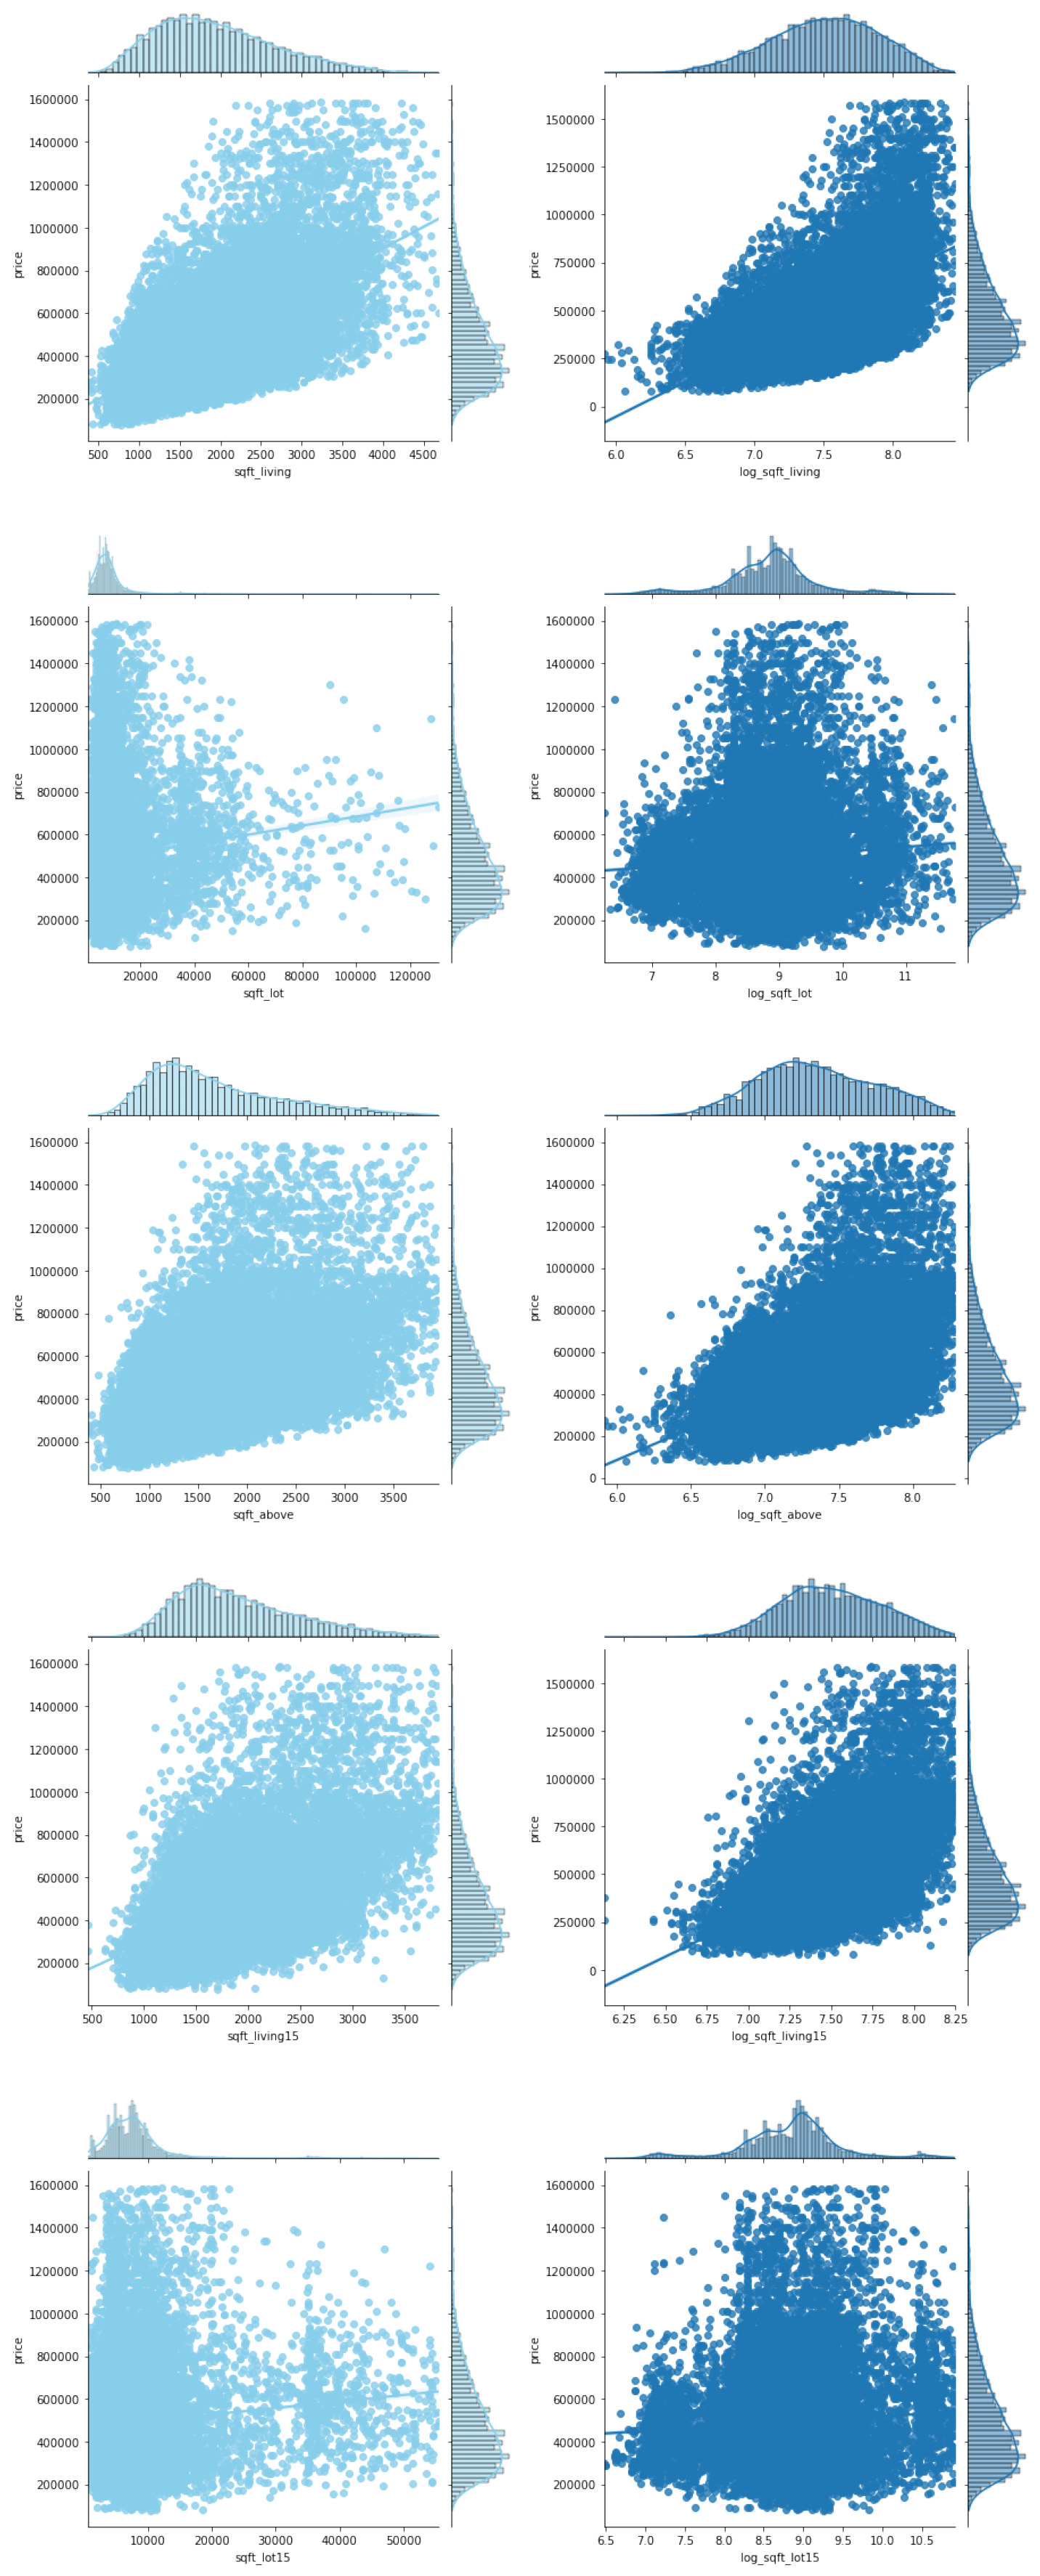

In [68]:
sqft_living = sns.jointplot(x = data['sqft_living'], y = data['price'], kind = 'reg', color = 'skyblue')
plt.ticklabel_format(style='plain', axis='y')
log_sqft_living = sns.jointplot(x = data_norm['log_sqft_living'], y = data_norm['price'], kind = 'reg')
plt.ticklabel_format(style='plain', axis='y')
sqft_lot = sns.jointplot(x = data['sqft_lot'], y = data['price'], kind = 'reg', color = 'skyblue')
plt.ticklabel_format(style='plain', axis='y')
log_sqft_lot = sns.jointplot(x = data_norm['log_sqft_lot'], y = data_norm['price'], kind = 'reg')
plt.ticklabel_format(style='plain', axis='y')
sqft_above = sns.jointplot(x = data['sqft_above'], y = data['price'], kind = 'reg', color = 'skyblue')
plt.ticklabel_format(style='plain', axis='y')
log_sqft_above = sns.jointplot(x = data_norm['log_sqft_above'], y = data_norm['price'], kind = 'reg')
plt.ticklabel_format(style='plain', axis='y')
sqft_living15 = sns.jointplot(x = data['sqft_living15'], y = data['price'], kind = 'reg', color = 'skyblue')
plt.ticklabel_format(style='plain', axis='y')
log_sqft_living15 = sns.jointplot(x = data_norm['log_sqft_living15'], y = data_norm['price'], kind = 'reg')
plt.ticklabel_format(style='plain', axis='y')
sqft_lot15 = sns.jointplot(x = data['sqft_lot15'], y = data['price'], kind = 'reg', color = 'skyblue')
plt.ticklabel_format(style='plain', axis='y')
log_sqft_lot15 = sns.jointplot(x = data_norm['log_sqft_lot15'], y = data_norm['price'], kind = 'reg')
plt.ticklabel_format(style='plain', axis='y')

sqft_living.savefig('sns.jointplots/sqft_living.png')
plt.close(sqft_living.fig)
log_sqft_living.savefig('sns.jointplots/log_sqft_living.png')
plt.close(log_sqft_living.fig)
sqft_lot.savefig('sns.jointplots/sqft_lot.png')
plt.close(sqft_lot.fig)
log_sqft_lot.savefig('sns.jointplots/log_sqft_lot.png')
plt.close(log_sqft_lot.fig)
sqft_above.savefig('sns.jointplots/sqft_above.png')
plt.close(sqft_above.fig)
log_sqft_above.savefig('sns.jointplots/log_sqft_above.png')
plt.close(log_sqft_above.fig)
sqft_living15.savefig('sns.jointplots/sqft_living15.png')
plt.close(sqft_living15.fig)
log_sqft_living15.savefig('sns.jointplots/log_sqft_living15.png')
plt.close(log_sqft_living15.fig)
sqft_lot15.savefig('sns.jointplots/sqft_lot15.png')
plt.close(sqft_lot15.fig)
log_sqft_lot15.savefig('sns.jointplots/log_sqft_lot15.png')
plt.close(log_sqft_lot15.fig)

f, axarr = plt.subplots(5, 2, figsize=(20, 50))

axarr[0,0].imshow(mpimg.imread('sns.jointplots/sqft_living.png'))
axarr[0,1].imshow(mpimg.imread('sns.jointplots/log_sqft_living.png'))
axarr[1,0].imshow(mpimg.imread('sns.jointplots/sqft_lot.png'))
axarr[1,1].imshow(mpimg.imread('sns.jointplots/log_sqft_lot.png'))
axarr[2,0].imshow(mpimg.imread('sns.jointplots/sqft_above.png'))
axarr[2,1].imshow(mpimg.imread('sns.jointplots/log_sqft_above.png'))
axarr[3,0].imshow(mpimg.imread('sns.jointplots/sqft_living15.png'))
axarr[3,1].imshow(mpimg.imread('sns.jointplots/log_sqft_living15.png'))
axarr[4,0].imshow(mpimg.imread('sns.jointplots/sqft_lot15.png'))
axarr[4,1].imshow(mpimg.imread('sns.jointplots/log_sqft_lot15.png'))

[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()

While the continuous features already seem to be linear and normally distributed, I will keep the *data_norm* version of the dataset for the modeling section and see whether it yields superior results. Nevertheless, caution is advised since the interpretation of the coefficient changes due to lognormal transformation.

#### Multicollinearity of Features
The aim of regression models is to analyze an individual coefficient's effect on a target variable, while keeping the others constant. If two or more predictors affect each other, we are facing **multicollinearity** and it is not possible to reliably interpret the estimates of single coefficients. 

For a quick glance at potential multicollineartiy among features, I create a heatmap/correlation matrix. I will only display half of it to avoid redundant information.

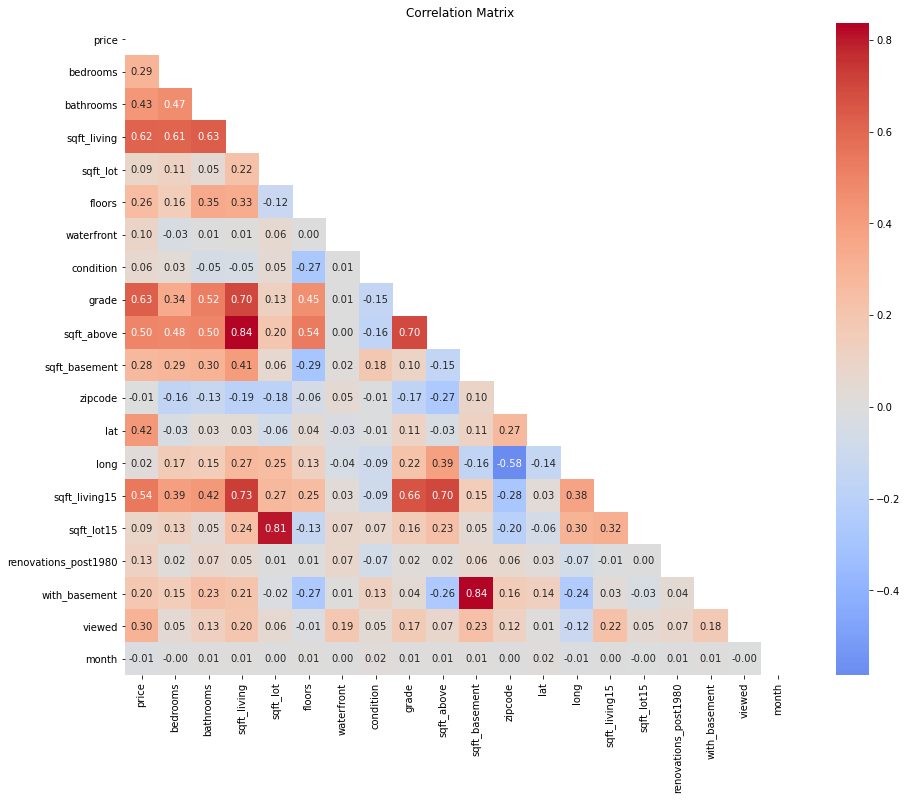

In [69]:
corr = data.corr()

# Hide upper half (redundant information)
hide = np.zeros_like(corr, dtype=bool)
hide[np.triu_indices_from(hide)] = True
corr[hide] = np.nan

# Plot heatmap
plt.figure(figsize = (15,12))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

Judging by their high multicollinearity with other features and the fact the we have similar features, I will drop **log_sqft_living15**, **log_sqft_above** and **log_sqft_lot15**. The high correlation between **with_basement** and **sqft_basement** should come at no surprise as the first is directly derived from the latter.

In [70]:
data = data.drop(['sqft_living15', 'sqft_above', 'sqft_lot15'],axis=1)

### Linear Regression
#### Splitting our Data into Train and Test set

Before I can build a model that predicts house prices as accurately as possible, I need to split the data into two portions:

* A **train set** which will be used to train our model with
* A **test set** used to gauge how well our model learned from the training data

Common splits between train and test set are **70/30** or **80/20**.

Before spliting our data though, I will define the dependent and independent variables from our dataset.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19858 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   price                 19858 non-null  float64 
 1   bedrooms              19858 non-null  int64   
 2   bathrooms             19858 non-null  int64   
 3   sqft_living           19858 non-null  int64   
 4   sqft_lot              19858 non-null  int64   
 5   floors                19858 non-null  float64 
 6   waterfront            19858 non-null  float64 
 7   condition             19858 non-null  int64   
 8   grade                 19858 non-null  int64   
 9   sqft_basement         19858 non-null  float64 
 10  yr_built              19858 non-null  category
 11  zipcode               19858 non-null  int64   
 12  lat                   19858 non-null  float64 
 13  long                  19858 non-null  float64 
 14  renovations_post1980  19858 non-null  int64   
 15  wi

In [72]:
# Split feature X (independent variables) by dropping the one variable that will be our target Y
X = data.drop('price', axis = 1) # By convention the independent variables are capitalized to show that they are a vector X
y = data['price']

# Splitting data into train and test set (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(" Length X_train: ",len(X_train),"\n Length X_test: ",len(X_test),"\n Length y_train: ",len(y_train),
      "\n Length y_test: ",len(y_test))

# Create a pandas dataframe from training set to enable feature engineering and further analysis
data = pd.concat([X_train, y_train], axis = 1)
display(data.head(5))

 Length X_train:  13900 
 Length X_test:  5958 
 Length y_train:  13900 
 Length y_test:  5958


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,zipcode,lat,long,renovations_post1980,with_basement,viewed,month,quarter,price
18131,3,2,1580,8659,1.0,0.0,4,7,360.0,1950-1975,98011,47.7599,-122.215,0,1,0,4,Q2,475000.0
15738,3,2,2280,8765,2.0,0.0,3,8,0.0,1975-2000,98058,47.4419,-122.133,0,0,0,9,Q3,356000.0
17425,3,2,1730,9516,1.0,0.0,3,8,550.0,1975-2000,98030,47.3823,-122.166,0,1,0,8,Q3,257000.0
15360,3,2,2650,7378,1.0,0.0,3,7,1190.0,1950-1975,98155,47.7525,-122.315,0,1,0,1,Q1,340000.0
6098,4,2,1940,7040,2.0,0.0,3,8,0.0,2000-2015,98092,47.2632,-122.209,0,0,0,3,Q1,320000.0


I will create a tabular overview of each model built, including an approach description as well as information regarding number of features, R² and R² adjusted and root mean squared error (RMSE) including its standard deviation.

In [73]:
models = pd.DataFrame({'Model': [], 'Description':[], 'No. of features' : [], 'R²':[], 'R² Adjusted':[], 'RMSE': [], 'RMSE std': []})

### Model 1 - Simple Linear Regression
I will begin with the simplest form of regression, having only **one parameter to fit a line through the data**.

In [74]:
model_1 = data.copy()

In [75]:
X_train = np.array(model_1['sqft_living']).reshape(-1,1) # As I am dealing with only a single feature,                        
y_train = model_1['price']                               # X_train needs to be reshaped into a column vector.

In [76]:
# Apply Ordinary Least Squares to the model and show how well the model fits the data
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8554.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:38:40   Log-Likelihood:            -1.8869e+05
No. Observations:               13900   AIC:                         3.774e+05
Df Residuals:                   13898   BIC:                         3.774e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.628e+04   4549.583     21.161      0.000    8.74e+04    1.05e+05
x1           200.7113      2.170     92.488      0.000     196.458     204.965
==============================================================================
Omnibus:                     2354.215   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4935.949
Skew:                           1.009   Prob(JB):                         0.00
Kurtosis:                       5.109   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, after all this preparation, we have our first model for predicting housing prices in the King County area! Admittedly, this is overtly simplified - one variable, the living area, to explain price. Nevertheless, in all its simplicity, still 38% of the variation in price are eplained. Not too shabby for such a simple approach. However, we can do much better.

The coefficent of **sqft_living** is approx. 201, implying that for every additional square-foot of living area, the (predicted) price increases by 201 USD. In other words, a house with a living area of 1,000 sqft will cost around 201,000 USD c.p.

### RMSE

In [77]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([197579.61043177, 190835.75339335, 184357.58503791, 188706.85363369,
       183453.13205306, 194328.09528696, 184128.55194412, 187991.92484187,
       200793.70565753, 189872.60993704])

190204.78222172972

5548.505758025225

The root mean squared error can be interpreted as the mean error in USD: For this first test case it means that the predicted price will be on average 190,204 USD more or less than the actual price.
The relatively low standard deviation of the RMSE is at approx. 5,549 USD, implying that this model is not overfitting.

No handles with labels found to put in legend.


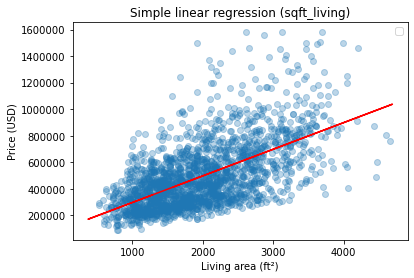

In [78]:
y_pred = linreg.predict(X_train)
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(x = X_train[:2000], y = y_train[:2000], alpha = 0.3)
plt.plot(X_train, y_pred, color = 'red')
plt.legend()
plt.title('Simple linear regression (sqft_living)')
plt.xlabel('Living area (ft²)')
plt.ylabel('Price (USD)')
plt.show()

As the living area increases, the actual data points become more dispersed, implying that the model (or sqft_living as predictor by itself) **decreases in forecast ability**.

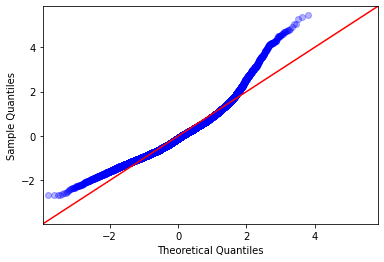

In [79]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

The qq-plot indicates that the residuals do not appear to be normally distributed as they stray from the percentile-matched line.

### Homoscedasticity

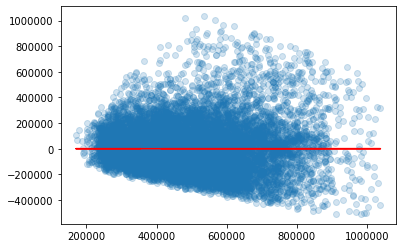

In [80]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

There seems to be some degree of heteroscedasticity, since the residuals are not randomly scattered around 0 (horizontal line). Lognormal transformation might mitigate this problem.

In [81]:
models.loc[0] = ['Simple Linear Regression', 'Sqft_living', model.df_model, round(model.rsquared,3), round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [82]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_simple.pkl','wb'))

### Model 2 - Multiple Linear Regression

In [83]:
model_2 = data.copy()

In [84]:
model_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13900 entries, 18131 to 17130
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   bedrooms              13900 non-null  int64   
 1   bathrooms             13900 non-null  int64   
 2   sqft_living           13900 non-null  int64   
 3   sqft_lot              13900 non-null  int64   
 4   floors                13900 non-null  float64 
 5   waterfront            13900 non-null  float64 
 6   condition             13900 non-null  int64   
 7   grade                 13900 non-null  int64   
 8   sqft_basement         13900 non-null  float64 
 9   yr_built              13900 non-null  category
 10  zipcode               13900 non-null  int64   
 11  lat                   13900 non-null  float64 
 12  long                  13900 non-null  float64 
 13  renovations_post1980  13900 non-null  int64   
 14  with_basement         13900 non-null  int64   
 15

Taking a look at the datatypes we can see that 'quarter' and 'yr_built' are Categories. As such, OLS would not be possible. For these features one-hot encoding will be necessary to make them usable for regression. But first, I will simply run the regression without these predictors.

In [85]:
X_train = model_2.drop(['price','yr_built','quarter'], axis = 1)
y_train = model_2['price']

In [86]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1678.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:38:52   Log-Likelihood:            -1.8455e+05
No. Observations:               13900   AIC:                         3.691e+05
Df Residuals:                   13883   BIC:                         3.693e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.352e+07   2.36e+06     -9.949      0.000   -2.82e+07   -1.89e+07
bedrooms             -1.495e+04   1812.493     -8.248      0.000   -1.85e+04   -1.14e+04
bathrooms             3531.9027   2459.556      1.436      0.151   -1289.158    8352.964
sqft_living            130.8096      3.385     38.639      0.000     124.174     137.446
sqft_lot                -0.4333      0.132     -3.294      0.001      -0.691      -0.175
floors                 434.3229   2995.163      0.145      0.885   -5436.600    6305.246
waterfront            2.941e+05   2.12e+04     13.900      0.000    2.53e+05    3.36e+05
condition             5.122e+04   1948.333     26.290      0.000    4.74e+04     5.5e+04
grade                 7.768e+04   1838.322     42.258      0.000    7.41e+04    8.13e+04
sqft_basement          -38.2275      6.529     -5.855      0.000     -51.026     -25.429
zipcode               -299.3948     28.851    -10.377      0.000    -355.948    -242.842
lat                   6.365e+05   9130.154     69.710      0.000    6.19e+05    6.54e+05
long                 -1.811e+05   1.26e+04    -14.385      0.000   -2.06e+05   -1.56e+05
renovations_post1980  1.105e+05   7334.418     15.066      0.000    9.61e+04    1.25e+05
with_basement         2.638e+04   4796.100      5.500      0.000     1.7e+04    3.58e+04
viewed                1.267e+05   4814.699     26.319      0.000    1.17e+05    1.36e+05
month                -2427.3648    384.253     -6.317      0.000   -3180.552   -1674.177
==============================================================================
Omnibus:                     3222.599   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11484.508
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       6.825   Cond. No.                     1.94e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With the exception of **bathrooms** and **floors**, all predictors are statistically significant at the 5% threshold of significance.

In [87]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([149262.35163012, 143465.1616809 , 140238.59892886, 141237.04693605,
       132203.96175478, 143312.65554742, 137163.34210446, 136841.66760007,
       151025.43695154, 138827.45228183])

141357.7675416036

5419.032289815979

The RMSE has been improved by roughly 50,000 USD. On average this model's predicted price is 141,000 USD above or below actual prices. Standard deviation of RMSE has slightly decreased.

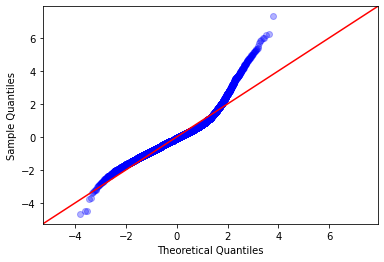

In [88]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

The residuals do not appear normally distributed.

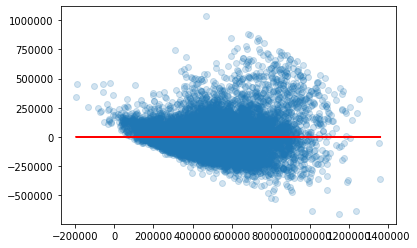

In [89]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

Some degree of heteroscedasticity is present.

In [90]:
models.loc[1] = ['Multiple Linear Regression', 'without yr_built & quarter', model.df_model, round(model.rsquared,3),round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [91]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_mult.pkl','wb'))

### Model 2.1 - Multiple Linear Regression with One-hot encoding

In [92]:
model_2_1 = model_2.copy()

In [93]:
yr_built_dummies = pd.get_dummies(data['yr_built'], prefix='yr_built', drop_first=True)
quarter_dummies = pd.get_dummies(data['quarter'], prefix='quarter', drop_first=True)
bedroom_dummies = pd.get_dummies(data['bedrooms'], prefix='bedrooms', drop_first=True)
bathroom_dummies = pd.get_dummies(data['bathrooms'], prefix='bathrooms', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)
view_dummies = pd.get_dummies(data['viewed'], prefix='viewed', drop_first=True)
floors_dummies = pd.get_dummies(data['floors'], prefix='floors', drop_first=True)

In [94]:
model_2_1 = model_2_1.drop(['yr_built', 'quarter', 'bedrooms', 'bathrooms', 'condition', 'grade', 'viewed', 'floors'], axis=1)
model_2_1 = pd.concat([model_2_1, yr_built_dummies, quarter_dummies, bedroom_dummies, bathroom_dummies, condition_dummies, grade_dummies, floors_dummies], axis=1)

In [95]:
X_train = model_2_1.drop(['price'], axis = 1)
y_train = model_2_1['price']

In [96]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     695.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:38:55   Log-Likelihood:            -1.8403e+05
No. Observations:               13900   AIC:                         3.682e+05
Df Residuals:                   13856   BIC:                         3.685e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.987e+06   2.49e+06      1.603      0.109   -8.89e+05    8.86e+06
sqft_living            112.4314      3.482     32.285      0.000     105.605     119.257
sqft_lot                -0.4576      0.132     -3.475      0.001      -0.716      -0.199
waterfront             3.89e+05   2.01e+04     19.349      0.000     3.5e+05    4.28e+05
sqft_basement           -4.4623      6.522     -0.684      0.494     -17.246       8.321
zipcode               -435.4733     28.520    -15.269      0.000    -491.376    -379.570
lat                   5.706e+05   9069.644     62.912      0.000    5.53e+05    5.88e+05
long                 -9.686e+04   1.28e+04     -7.563      0.000   -1.22e+05   -7.18e+04
renovations_post1980  6.072e+04   7366.294      8.242      0.000    4.63e+04    7.52e+04
with_basement         2.192e+04   4721.257      4.643      0.000    1.27e+04    3.12e+04
month                -2376.6120   1418.751     -1.675      0.094   -5157.556     404.332
yr_built_1950-1975   -7.753e+04   3948.181    -19.637      0.000   -8.53e+04   -6.98e+04
yr_built_1975-2000   -1.342e+05   4777.874    -28.096      0.000   -1.44e+05   -1.25e+05
yr_built_2000-2015   -1.338e+05   5456.981    -24.516      0.000   -1.44e+05   -1.23e+05
quarter_Q2            2710.3899   5160.046      0.525      0.599   -7403.998    1.28e+04
quarter_Q3           -4305.8842   8797.097     -0.489      0.625   -2.15e+04    1.29e+04
quarter_Q4            1494.1895   1.28e+04      0.116      0.907   -2.37e+04    2.67e+04
bedrooms_2           -2420.1652   1.27e+04     -0.191      0.848   -2.72e+04    2.24e+04
bedrooms_3           -1.454e+04   1.27e+04     -1.142      0.254   -3.95e+04    1.04e+04
bedrooms_4           -3.121e+04    1.3e+04     -2.392      0.017   -5.68e+04   -5638.752
bedrooms_5           -4.553e+04   1.39e+04     -3.286      0.001   -7.27e+04   -1.84e+04
bedrooms_6           -5.709e+04    1.7e+04     -3.348      0.001   -9.05e+04   -2.37e+04
bathrooms_1           9.508e+04   7.88e+04      1.206      0.228   -5.95e+04     2.5e+05
bathrooms_2           1.066e+05   7.89e+04      1.352      0.176   -4.79e+04    2.61e+05
bathrooms_3           1.345e+05    7.9e+04      1.703      0.089   -2.03e+04    2.89e+05
bathrooms_4           1.688e+05   7.92e+04      2.133      0.033    1.37e+04    3.24e+05
condition_2          -4.051e+04   3.66e+04     -1.106      0.269   -1.12e+05    3.13e+04
condition_3          -6498.1425   3.44e+04     -0.189      0.850   -7.39e+04    6.09e+04
condition_4           2.935e+04   3.44e+04      0.853      0.394   -3.81e+04    9.68e+04
condition_5           6.527e+04   3.46e+04      1.888      0.059   -2509.916    1.33e+05
grade_4              -1.259e+05   1.41e+05     -0.896      0.370   -4.01e+05     1.5e+05
grade_5               -1.63e+05   1.37e+05     -1.188    

In [97]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([147161.72123681, 137997.66240489, 137333.4934682 , 139082.15488369,
       127226.33684524, 136701.24119296, 129937.72000755, 131863.17332946,
       143124.7976574 , 135979.48617056])

136640.7787196756

5637.7586537736815

RMSE improved yet again, however, there are quite a few coefficients with a p-value above 0.05. The standard deviation of the RMSE, however, has slightly increased.

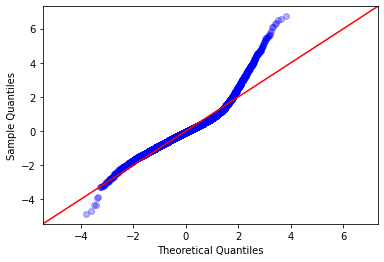

In [98]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

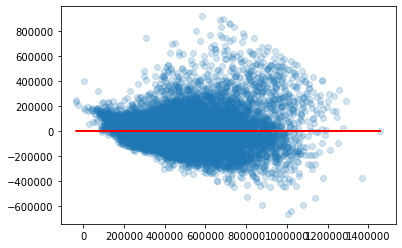

In [99]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

In [100]:
models.loc[2] = ['Multiple Linear Regression', 'one-hot encoding', model.df_model, round(model.rsquared,3),round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [101]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_mult_oh.pkl','wb'))

I will eliminate all these features to see if this improves the overall quality of the model.

In [102]:
model_2_1_pval = ['price', 'sqft_living', 'sqft_lot', 'waterfront', 'zipcode', 'lat', 'long', 'renovations_post1980', 
                              'with_basement', 'month', 'yr_built_1950-1975', 'yr_built_1975-2000', 'yr_built_2000-2015', 'bedrooms_4', 
                              'bedrooms_5', 'bedrooms_6', 'bathrooms_4', 'condition_5', 'grade_10', 'grade_11', 'grade_12', 'floors_1.5',
                              'floors_2.0', 'floors_2.5', 'floors_3.0']

In [103]:
model_2_1_final = model_2_1[model_2_1_pval]

In [104]:
X_train = model_2_1_final.drop(['price'], axis = 1)
y_train = model_2_1_final['price']

In [105]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     937.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:38:58   Log-Likelihood:            -1.8533e+05
No. Observations:               13900   AIC:                         3.707e+05
Df Residuals:                   13875   BIC:                         3.709e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.893e+06   2.68e+06      1.081      0.280   -2.35e+06    8.14e+06
sqft_living            191.0779      2.737     69.801      0.000     185.712     196.444
sqft_lot                -0.2468      0.144     -1.719      0.086      -0.528       0.035
waterfront            4.167e+05    2.2e+04     18.945      0.000    3.74e+05     4.6e+05
zipcode               -542.6831     30.926    -17.548      0.000    -603.303    -482.063
lat                   6.451e+05   9709.088     66.440      0.000    6.26e+05    6.64e+05
long                 -1.621e+05   1.39e+04    -11.658      0.000   -1.89e+05   -1.35e+05
renovations_post1980  6.903e+04   7924.853      8.711      0.000    5.35e+04    8.46e+04
with_basement         1.441e+04   3128.920      4.604      0.000    8273.010    2.05e+04
month                -2377.9061    406.664     -5.847      0.000   -3175.023   -1580.789
yr_built_1950-1975   -5.813e+04   4013.615    -14.484      0.000    -6.6e+04   -5.03e+04
yr_built_1975-2000   -9.647e+04   4761.268    -20.261      0.000   -1.06e+05   -8.71e+04
yr_built_2000-2015   -9.529e+04   5429.534    -17.551      0.000   -1.06e+05   -8.46e+04
bedrooms_4           -2.581e+04   3271.362     -7.890      0.000   -3.22e+04   -1.94e+04
bedrooms_5           -5.681e+04   5790.204     -9.811      0.000   -6.82e+04   -4.55e+04
bedrooms_6           -9.078e+04   1.22e+04     -7.415      0.000   -1.15e+05   -6.68e+04
bathrooms_4           4.282e+04   7257.896      5.899      0.000    2.86e+04     5.7e+04
condition_5           5.633e+04   4846.128     11.624      0.000    4.68e+04    6.58e+04
grade_10              1.673e+05   7208.896     23.213      0.000    1.53e+05    1.81e+05
grade_11              2.919e+05   1.92e+04     15.171      0.000    2.54e+05     3.3e+05
grade_12              5.382e+05    1.5e+05      3.595      0.000    2.45e+05    8.32e+05
floors_1.5             2.81e+04   5048.959      5.566      0.000    1.82e+04     3.8e+04
floors_2.0            4.674e+04   4185.108     11.168      0.000    3.85e+04    5.49e+04
floors_2.5            1.372e+05   1.78e+04      7.712      0.000    1.02e+05    1.72e+05
floors_3.0            8.637e+04   8970.898      9.628      0.000    6.88e+04    1.04e+05
==============================================================================
Omnibus:                     2996.825   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10741.712
Skew:                           1.058   Prob(JB):                         0.00
Kurtosis:                       6.751   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition

While all coefficients with the exception of sqft_lot are statistically significant,  R² (the overall proportion of the variance for price that is explained by the predictors) actually decreased by ca. 6%.

In [106]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([160779.09730581, 151846.72032894, 145277.45596325, 152056.69853929,
       141125.70760491, 150031.72716044, 143672.32813769, 144272.59931184,
       157369.29117284, 150468.79913388])

149690.04246588927

5927.004774897093

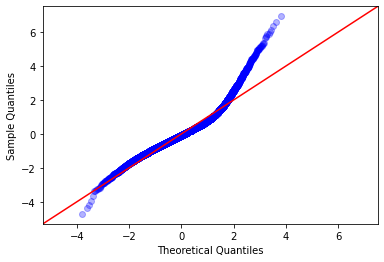

In [107]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

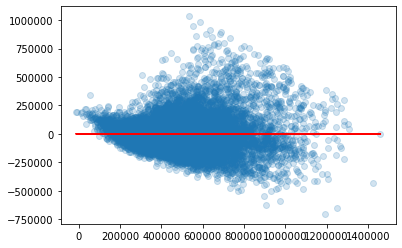

In [108]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

In [109]:
models.loc[3] = ['Multiple Linear Regression', 'one-hot encoding & p-values elim.', model.df_model, round(model.rsquared,3),round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [110]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_mult_pval.pkl','wb'))

## Model 2.2 - Multiple Linear Regression with Scaled Features

In [111]:
model_2_2 = model_2_1.copy()

In [112]:
scaled_sqft_living = (model_2_2['sqft_living'] - min(model_2_2['sqft_living']))/(max(data['sqft_living']) - min(model_2_2['sqft_living']))
scaled_sqft_lot = (model_2_2['sqft_lot'] - min(model_2_2['sqft_lot']))/(max(model_2_2['sqft_lot']) - min(model_2_2['sqft_lot']))
scaled_sqft_basement = (model_2_2['sqft_basement'] - min(model_2_2['sqft_basement']))/(max(model_2_2['sqft_basement']) - min(model_2_2['sqft_basement']))
                                 
model_2_2['sqft_living'] = scaled_sqft_living
model_2_2['sqft_lot'] = scaled_sqft_lot
model_2_2['sqft_basement'] = scaled_sqft_basement

In [113]:
X_train = model_2_2.drop(['price'], axis = 1)
y_train = model_2_2['price']

In [114]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     695.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:39:00   Log-Likelihood:            -1.8403e+05
No. Observations:               13900   AIC:                         3.682e+05
Df Residuals:                   13856   BIC:                         3.685e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.028e+06   2.49e+06      1.619      0.105   -8.48e+05     8.9e+06
sqft_living           4.857e+05    1.5e+04     32.285      0.000    4.56e+05    5.15e+05
sqft_lot             -5.956e+04   1.71e+04     -3.475      0.001   -9.32e+04    -2.6e+04
waterfront             3.89e+05   2.01e+04     19.349      0.000     3.5e+05    4.28e+05
sqft_basement        -1.026e+04    1.5e+04     -0.684      0.494   -3.97e+04    1.91e+04
zipcode               -435.4733     28.520    -15.269      0.000    -491.376    -379.570
lat                   5.706e+05   9069.644     62.912      0.000    5.53e+05    5.88e+05
long                 -9.686e+04   1.28e+04     -7.563      0.000   -1.22e+05   -7.18e+04
renovations_post1980  6.072e+04   7366.294      8.242      0.000    4.63e+04    7.52e+04
with_basement         2.192e+04   4721.257      4.643      0.000    1.27e+04    3.12e+04
month                -2376.6120   1418.751     -1.675      0.094   -5157.556     404.332
yr_built_1950-1975   -7.753e+04   3948.181    -19.637      0.000   -8.53e+04   -6.98e+04
yr_built_1975-2000   -1.342e+05   4777.874    -28.096      0.000   -1.44e+05   -1.25e+05
yr_built_2000-2015   -1.338e+05   5456.981    -24.516      0.000   -1.44e+05   -1.23e+05
quarter_Q2            2710.3899   5160.046      0.525      0.599   -7403.998    1.28e+04
quarter_Q3           -4305.8842   8797.097     -0.489      0.625   -2.15e+04    1.29e+04
quarter_Q4            1494.1895   1.28e+04      0.116      0.907   -2.37e+04    2.67e+04
bedrooms_2           -2420.1652   1.27e+04     -0.191      0.848   -2.72e+04    2.24e+04
bedrooms_3           -1.454e+04   1.27e+04     -1.142      0.254   -3.95e+04    1.04e+04
bedrooms_4           -3.121e+04    1.3e+04     -2.392      0.017   -5.68e+04   -5638.752
bedrooms_5           -4.553e+04   1.39e+04     -3.286      0.001   -7.27e+04   -1.84e+04
bedrooms_6           -5.709e+04    1.7e+04     -3.348      0.001   -9.05e+04   -2.37e+04
bathrooms_1           9.508e+04   7.88e+04      1.206      0.228   -5.95e+04     2.5e+05
bathrooms_2           1.066e+05   7.89e+04      1.352      0.176   -4.79e+04    2.61e+05
bathrooms_3           1.345e+05    7.9e+04      1.703      0.089   -2.03e+04    2.89e+05
bathrooms_4           1.688e+05   7.92e+04      2.133      0.033    1.37e+04    3.24e+05
condition_2          -4.051e+04   3.66e+04     -1.106      0.269   -1.12e+05    3.13e+04
condition_3          -6498.1425   3.44e+04     -0.189      0.850   -7.39e+04    6.09e+04
condition_4           2.935e+04   3.44e+04      0.853      0.394   -3.81e+04    9.68e+04
condition_5           6.527e+04   3.46e+04      1.888      0.059   -2509.916    1.33e+05
grade_4              -1.259e+05   1.41e+05     -0.896      0.370   -4.01e+05     1.5e+05
grade_5               -1.63e+05   1.37e+05     -1.188    

In [115]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([147161.72123681, 137997.6624049 , 137333.4934682 , 139082.15488369,
       127226.33684524, 136701.24119296, 129937.72000755, 131863.17332946,
       143124.7976574 , 135979.48617056])

136640.778719676

5637.758653772647

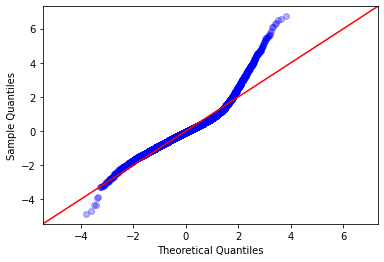

In [116]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

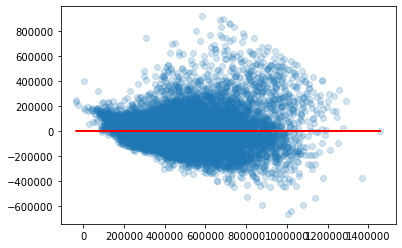

In [117]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

In [118]:
models.loc[4] = ['Multiple Linear Regression', 'Scaled Features', model.df_model, round(model.rsquared,3),round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [119]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_mult_scale.pkl','wb'))

### Model 3 - Recursive Feature Elimination (RFE)
Finally, I will use recursive feature elimination to examine an ideal balance of features and model performance.
For this, I will start with **Model 2_1**, which is the best performing model.

In [120]:
X = model_2_1.drop('price', axis=1)
y = model_2_1['price']

r_squ_adj_list = [] # create list to store calculated adj. R²
    
for i in range(len(X.columns)):
    linreg = LinearRegression() 
    selector = RFE(linreg, n_features_to_select=(i+1)) 
    selector = selector.fit(X, y.values.ravel()) 
    selected_columns = X.columns[selector.support_ ]
    linreg.fit(X[selected_columns],y) 
    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
    yhat = linreg.predict(X[selected_columns]) 
 
    SSR = np.sum((y-yhat)**2) # Residual Sum of Squares
    SST = np.sum((y-np.mean(y))**2) # Total Sum of Squares
    r_squ = 1 - (float(SSR))/SST # R²
    adj_r_squ = 1 - (1-r_squ)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1) # adj. R²
    r_squ_adj_list.append(adj_r_squ)
    
print("Number of features: ",len(X.columns))

Number of features:  43


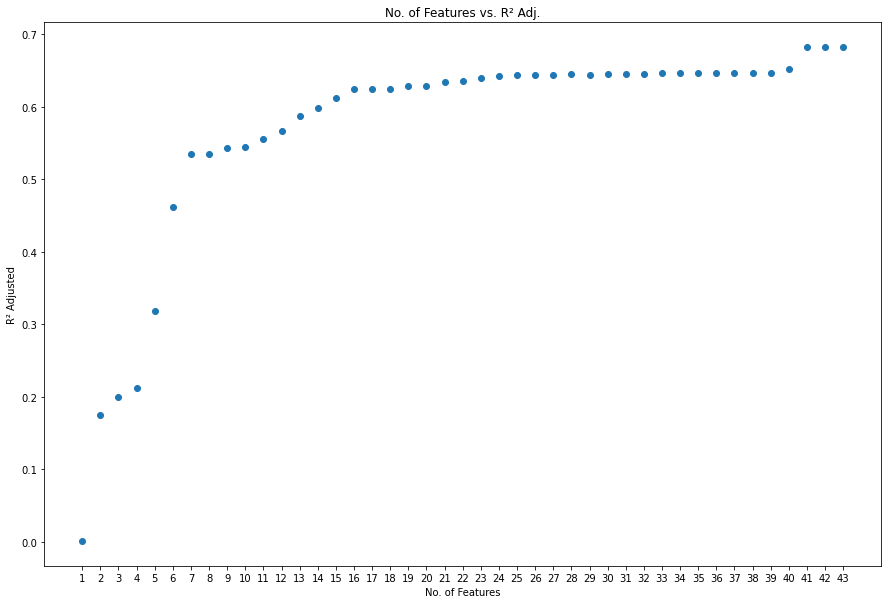

In [121]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
x=np.array(range(1,len(X.columns)+1))
y2=r_squ_adj_list
plt.scatter(x,y2)
plt.title("No. of Features vs. R² Adj.")
plt.xticks(x)
plt.xlabel("No. of Features")
plt.ylabel("R² Adjusted");

In [122]:
# Show top 5 features
linreg = LinearRegression() 
selector = RFE(linreg, n_features_to_select=(5)) 
selector = selector.fit(X, y.values.ravel()) 
selected_columns = X.columns[selector.support_ ]
selected_columns

Index(['waterfront', 'lat', 'grade_10', 'grade_11', 'grade_12'], dtype='object')

In [123]:
# Select number of features until which a clear improved in R² Adj. can be seen
linreg = LinearRegression() 
selector = RFE(linreg, n_features_to_select=(41)) 
selector = selector.fit(X_train, y_train) 
selected_features = X_train.columns[selector.support_ ]
selected_features

Index(['sqft_living', 'sqft_lot', 'waterfront', 'sqft_basement', 'lat', 'long',
       'renovations_post1980', 'with_basement', 'yr_built_1950-1975',
       'yr_built_1975-2000', 'yr_built_2000-2015', 'quarter_Q2', 'quarter_Q3',
       'quarter_Q4', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5'],
      dtype='object')

In [124]:
X_train = X_train[selected_features]

In [125]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     711.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:39:23   Log-Likelihood:            -1.8415e+05
No. Observations:               13900   AIC:                         3.684e+05
Df Residuals:                   13858   BIC:                         3.687e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.658e+07   1.49e+06    -17.890      0.000   -2.95e+07   -2.37e+07
sqft_living           4.848e+05   1.52e+04     31.955      0.000    4.55e+05    5.15e+05
sqft_lot             -6.458e+04   1.73e+04     -3.737      0.000   -9.85e+04   -3.07e+04
waterfront            3.765e+05   2.03e+04     18.586      0.000    3.37e+05    4.16e+05
sqft_basement        -1.316e+04   1.51e+04     -0.870      0.384   -4.28e+04    1.65e+04
lat                   5.417e+05   8945.511     60.557      0.000    5.24e+05    5.59e+05
long                 -8961.9529   1.15e+04     -0.777      0.437   -3.16e+04    1.36e+04
renovations_post1980  6.153e+04   7427.980      8.284      0.000     4.7e+04    7.61e+04
with_basement         2.008e+04   4759.433      4.218      0.000    1.07e+04    2.94e+04
yr_built_1950-1975   -7.001e+04   3950.125    -17.724      0.000   -7.78e+04   -6.23e+04
yr_built_1975-2000   -1.228e+05   4759.003    -25.813      0.000   -1.32e+05   -1.14e+05
yr_built_2000-2015   -1.277e+05   5488.160    -23.260      0.000   -1.38e+05   -1.17e+05
quarter_Q2           -4113.8140   3391.926     -1.213      0.225   -1.08e+04    2534.819
quarter_Q3            -1.79e+04   3481.014     -5.143      0.000   -2.47e+04   -1.11e+04
quarter_Q4           -1.857e+04   3648.002     -5.091      0.000   -2.57e+04   -1.14e+04
bedrooms_2           -2733.4918   1.28e+04     -0.214      0.830   -2.78e+04    2.23e+04
bedrooms_3           -1.306e+04   1.28e+04     -1.017      0.309   -3.82e+04    1.21e+04
bedrooms_4           -2.892e+04   1.32e+04     -2.199      0.028   -5.47e+04   -3135.867
bedrooms_5           -4.229e+04    1.4e+04     -3.027      0.002   -6.97e+04   -1.49e+04
bedrooms_6           -5.392e+04   1.72e+04     -3.137      0.002   -8.76e+04   -2.02e+04
bathrooms_1           1.067e+05   7.95e+04      1.342      0.179   -4.91e+04    2.63e+05
bathrooms_2           1.203e+05   7.95e+04      1.513      0.130   -3.56e+04    2.76e+05
bathrooms_3           1.481e+05   7.96e+04      1.860      0.063   -7982.968    3.04e+05
bathrooms_4           1.815e+05   7.98e+04      2.273      0.023     2.5e+04    3.38e+05
condition_2          -4.706e+04   3.69e+04     -1.274      0.203   -1.19e+05    2.54e+04
condition_3          -1.311e+04   3.47e+04     -0.378      0.706   -8.11e+04    5.49e+04
condition_4           2.808e+04   3.47e+04      0.809      0.418   -3.99e+04    9.61e+04
condition_5           6.161e+04   3.49e+04      1.767      0.077   -6739.969     1.3e+05
grade_4              -1.216e+05   1.42e+05     -0.858      0.391   -3.99e+05    1.56e+05
grade_5              -1.632e+05   1.38e+05     -1.179      0.239   -4.35e+05    1.08e+05
grade_6              -1.346e+05   1.38e+05     -0.974      0.330   -4.05e+05    1.36e+05
grade_7               -6.09e+04   1.38e+05     -0.441    

In [126]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([148341.48599706, 138913.07824921, 139433.45078919, 139377.93860643,
       127116.59926489, 137864.26063559, 130929.67495375, 133581.48232782,
       145024.09285089, 137117.8230062 ])

137769.98866810396

5910.162742242683

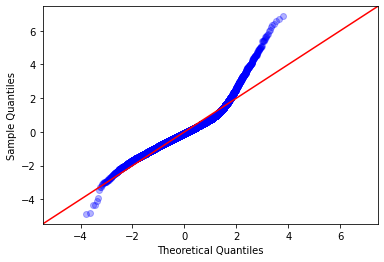

In [127]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

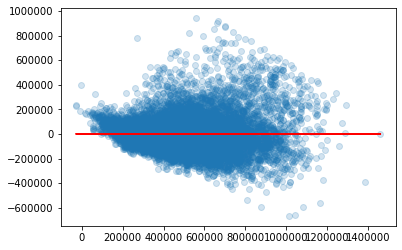

In [128]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

In [129]:
models.loc[5] = ['Multiple Linear Regression', 'RFE', model.df_model, round(model.rsquared,3),round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [130]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_rfe.pkl','wb'))

### Model 4 - Multiple Linear Regression with lognormal features
As a final model, I will analyze the impact of lognormalizing certain features (*data_norm*).

In [131]:
yr_built_dummies = pd.get_dummies(data_norm['yr_built'], prefix='yr_built', drop_first=True)
quarter_dummies = pd.get_dummies(data_norm['quarter'], prefix='quarter', drop_first=True)
bedroom_dummies = pd.get_dummies(data_norm['bedrooms'], prefix='bedrooms', drop_first=True)
bathroom_dummies = pd.get_dummies(data_norm['bathrooms'], prefix='bathrooms', drop_first=True)
condition_dummies = pd.get_dummies(data_norm['condition'], prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(data_norm['grade'], prefix='grade', drop_first=True)
view_dummies = pd.get_dummies(data_norm['viewed'], prefix='viewed', drop_first=True)
floors_dummies = pd.get_dummies(data_norm['floors'], prefix='floors', drop_first=True)

In [132]:
data_norm = data_norm.drop(['yr_built', 'quarter', 'bedrooms', 'bathrooms', 'condition', 'grade', 'viewed', 'floors'], axis=1)
data_norm = pd.concat([data_norm, yr_built_dummies, quarter_dummies, bedroom_dummies, bathroom_dummies, condition_dummies, grade_dummies, floors_dummies], axis=1)

In [133]:
X_train = data_norm.drop(['price'], axis = 1)
y_train = data_norm['price']

In [134]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     966.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:39:27   Log-Likelihood:            -2.6265e+05
No. Observations:               19858   AIC:                         5.254e+05
Df Residuals:                   19811   BIC:                         5.258e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.241e+06   2.09e+06     -2.028      0.043   -8.34e+06   -1.42e+05
waterfront            3.618e+05   1.69e+04     21.363      0.000    3.29e+05    3.95e+05
sqft_basement          105.0985      7.428     14.149      0.000      90.539     119.658
zipcode               -370.7986     23.487    -15.788      0.000    -416.834    -324.763
lat                   5.561e+05   7549.288     73.663      0.000    5.41e+05    5.71e+05
long                 -1.048e+05   1.07e+04     -9.828      0.000   -1.26e+05   -8.39e+04
renovations_post1980  7.914e+04   6138.763     12.892      0.000    6.71e+04    9.12e+04
with_basement         2.662e+04   4128.859      6.447      0.000    1.85e+04    3.47e+04
month                -3193.4572   1172.022     -2.725      0.006   -5490.718    -896.196
log_sqft_living      -6.071e+04    1.5e+04     -4.056      0.000      -9e+04   -3.14e+04
log_sqft_lot         -2114.1798   3298.662     -0.641      0.522   -8579.833    4351.473
log_sqft_above        2.233e+05   1.38e+04     16.159      0.000    1.96e+05     2.5e+05
log_sqft_living15     1.303e+05   5185.422     25.125      0.000     1.2e+05     1.4e+05
log_sqft_lot15       -3.096e+04   3615.704     -8.564      0.000   -3.81e+04   -2.39e+04
yr_built_1950-1975   -7.623e+04   3299.999    -23.101      0.000   -8.27e+04   -6.98e+04
yr_built_1975-2000   -1.307e+05   3953.269    -33.049      0.000   -1.38e+05   -1.23e+05
yr_built_2000-2015   -1.412e+05   4603.107    -30.671      0.000    -1.5e+05   -1.32e+05
quarter_Q2            8257.2931   4266.931      1.935      0.053    -106.249    1.66e+04
quarter_Q3             168.9306   7272.148      0.023      0.981   -1.41e+04    1.44e+04
quarter_Q4            8749.3793   1.06e+04      0.824      0.410   -1.21e+04    2.96e+04
bedrooms_2           -7991.3924   1.06e+04     -0.755      0.450   -2.87e+04    1.27e+04
bedrooms_3           -2.465e+04   1.07e+04     -2.299      0.022   -4.57e+04   -3635.429
bedrooms_4           -3.611e+04    1.1e+04     -3.274      0.001   -5.77e+04   -1.45e+04
bedrooms_5            -3.84e+04   1.17e+04     -3.288      0.001   -6.13e+04   -1.55e+04
bedrooms_6           -5.175e+04   1.44e+04     -3.588      0.000      -8e+04   -2.35e+04
bathrooms_1           6.151e+04   6.74e+04      0.913      0.361   -7.06e+04    1.94e+05
bathrooms_2           6.677e+04   6.74e+04      0.991      0.322   -6.53e+04    1.99e+05
bathrooms_3           9.489e+04   6.75e+04      1.406      0.160   -3.74e+04    2.27e+05
bathrooms_4           1.411e+05   6.77e+04      2.086      0.037    8505.594    2.74e+05
condition_2           1.858e+04   2.78e+04      0.668      0.504   -3.59e+04    7.31e+04
condition_3           3.113e+04   2.57e+04      1.211      0.226   -1.93e+04    8.15e+04
condition_4            7.01e+04   2.57e+04      2.725    

In [135]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([130981.59551482, 134976.66308694, 134249.92119521, 139388.43874388,
       133416.33470409, 135082.35628633, 129423.40343843, 139880.25794637,
       138284.60609135, 133366.22013968])

134904.97971470945

3267.519586205013

In [136]:
models.loc[6] = ['Multiple Linear Regression', 'Lognormal', model.df_model, round(model.rsquared,3),round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [137]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_log.pkl','wb'))

### Model 4.1 - RFE with lognormal features
Building upon the lognormal data, I will again apply RFE to see what number of features improve R² adjusted.

In [138]:
X = data_norm.drop('price', axis=1)
y = data_norm['price']

r_squ_adj_list = [] # create list to store calculated adj. R²
    
for i in range(len(X.columns)):
    linreg = LinearRegression() 
    selector = RFE(linreg, n_features_to_select=(i+1)) 
    selector = selector.fit(X, y.values.ravel()) 
    selected_columns = X.columns[selector.support_ ]
    linreg.fit(X[selected_columns],y) 
    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
    yhat = linreg.predict(X[selected_columns]) 
 
    SSR = np.sum((y-yhat)**2) # Residual Sum of Squares
    SST = np.sum((y-np.mean(y))**2) # Total Sum of Squares
    r_squ = 1 - (float(SSR))/SST # R²
    adj_r_squ = 1 - (1-r_squ)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1) # adj. R²
    r_squ_adj_list.append(adj_r_squ)

print("Number of features: ",len(X.columns))

Number of features:  46


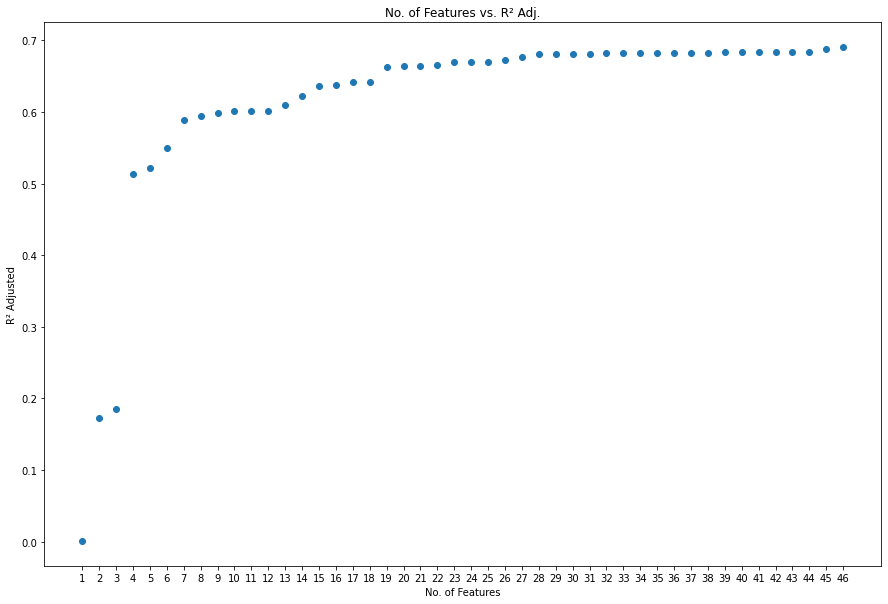

In [139]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
x=np.array(range(1,len(X.columns)+1))
y2=r_squ_adj_list
plt.scatter(x,y2)
plt.title("No. of Features vs. R² Adj.")
plt.xticks(x)
plt.xlabel("No. of Features")
plt.ylabel("R² Adjusted");

In [140]:
# Show top 5 features
linreg = LinearRegression() 
selector = RFE(linreg, n_features_to_select=(5)) 
selector = selector.fit(X, y.values.ravel()) 
selected_columns = X.columns[selector.support_ ]
selected_columns

Index(['waterfront', 'lat', 'log_sqft_living', 'grade_11', 'grade_12'], dtype='object')

In [141]:
# Select number of features until which a clear improved in R² Adj. can be seen
linreg = LinearRegression() 
selector = RFE(linreg, n_features_to_select=(28)) 
selector = selector.fit(X_train, y_train) 
selected_features = X_train.columns[selector.support_ ]
selected_features

Index(['waterfront', 'lat', 'long', 'renovations_post1980', 'with_basement',
       'log_sqft_living', 'log_sqft_above', 'log_sqft_living15',
       'log_sqft_lot15', 'yr_built_1950-1975', 'yr_built_1975-2000',
       'yr_built_2000-2015', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'condition_4', 'condition_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'floors_2.5'],
      dtype='object')

In [142]:
X_train = X_train[selected_features]

In [143]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1520.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:40:00   Log-Likelihood:            -2.6296e+05
No. Observations:               19858   AIC:                         5.260e+05
Df Residuals:                   19829   BIC:                         5.262e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.169e+07   1.25e+06    -25.391      0.000   -3.41e+07   -2.92e+07
waterfront            3.596e+05   1.71e+04     21.021      0.000    3.26e+05    3.93e+05
lat                   5.362e+05   7403.792     72.422      0.000    5.22e+05    5.51e+05
long                 -3.919e+04   9607.698     -4.079      0.000    -5.8e+04   -2.04e+04
renovations_post1980  8.378e+04   6197.905     13.518      0.000    7.16e+04    9.59e+04
with_basement         3.935e+04   4038.335      9.744      0.000    3.14e+04    4.73e+04
log_sqft_living       7.915e+04   9304.613      8.506      0.000    6.09e+04    9.74e+04
log_sqft_above        8.762e+04   9202.042      9.522      0.000    6.96e+04    1.06e+05
log_sqft_living15      1.35e+05   5211.267     25.906      0.000    1.25e+05    1.45e+05
log_sqft_lot15       -3.545e+04   2098.343    -16.896      0.000   -3.96e+04   -3.13e+04
yr_built_1950-1975   -6.975e+04   3046.061    -22.898      0.000   -7.57e+04   -6.38e+04
yr_built_1975-2000   -1.195e+05   3691.400    -32.379      0.000   -1.27e+05   -1.12e+05
yr_built_2000-2015   -1.349e+05   4188.461    -32.210      0.000   -1.43e+05   -1.27e+05
bathrooms_1           9.094e+04   6.83e+04      1.331      0.183    -4.3e+04    2.25e+05
bathrooms_2           8.986e+04   6.83e+04      1.315      0.189   -4.41e+04    2.24e+05
bathrooms_3           1.215e+05   6.84e+04      1.776      0.076   -1.26e+04    2.56e+05
bathrooms_4           1.732e+05   6.86e+04      2.524      0.012    3.87e+04    3.08e+05
condition_4           4.475e+04   2466.710     18.141      0.000    3.99e+04    4.96e+04
condition_5           8.166e+04   3909.435     20.888      0.000     7.4e+04    8.93e+04
grade_4               -1.93e+05   1.39e+05     -1.388      0.165   -4.66e+05    7.95e+04
grade_5              -2.309e+05   1.37e+05     -1.687      0.092   -4.99e+05    3.74e+04
grade_6               -2.18e+05   1.37e+05     -1.596      0.111   -4.86e+05    4.98e+04
grade_7              -1.687e+05   1.37e+05     -1.234      0.217   -4.37e+05    9.92e+04
grade_8              -8.354e+04   1.37e+05     -0.611      0.541   -3.52e+05    1.84e+05
grade_9               5.659e+04   1.37e+05      0.414      0.679   -2.12e+05    3.25e+05
grade_10               1.77e+05   1.37e+05      1.293      0.196   -9.14e+04    4.45e+05
grade_11              3.069e+05   1.38e+05      2.231      0.026    3.73e+04    5.76e+05
grade_12              6.301e+05   1.93e+05      3.259      0.001    2.51e+05    1.01e+06
floors_2.5            4.855e+04   1.26e+04      3.847      0.000    2.38e+04    7.33e+04
==============================================================================
Omnibus:                     4701.434   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18266.82

In [144]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([132578.77811632, 137437.94827041, 136176.81395968, 142092.1228367 ,
       136078.59848453, 136861.610576  , 129997.57878347, 142165.83848531,
       140422.75215429, 134388.8924899 ])

136820.0934156624

3756.909971729509

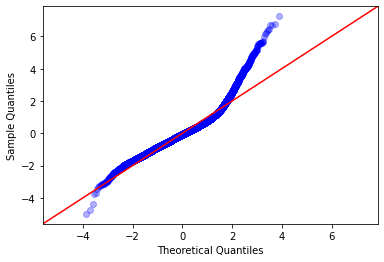

In [145]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

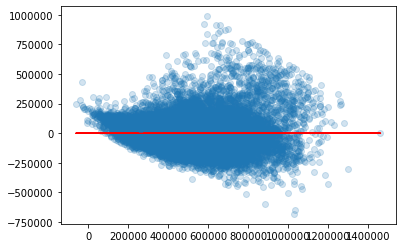

In [146]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

In [147]:
models.loc[7] = ['Multiple Linear Regression', 'Lognormal RFE', model.df_model, round(model.rsquared,3),round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std())]

In [148]:
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('models/model_rfe_log.pkl','wb'))

In [149]:
X_train = X_train[selected_features]

In [150]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1520.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:40:02   Log-Likelihood:            -2.6296e+05
No. Observations:               19858   AIC:                         5.260e+05
Df Residuals:                   19829   BIC:                         5.262e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.169e+07   1.25e+06    -25.391      0.000   -3.41e+07   -2.92e+07
waterfront            3.596e+05   1.71e+04     21.021      0.000    3.26e+05    3.93e+05
lat                   5.362e+05   7403.792     72.422      0.000    5.22e+05    5.51e+05
long                 -3.919e+04   9607.698     -4.079      0.000    -5.8e+04   -2.04e+04
renovations_post1980  8.378e+04   6197.905     13.518      0.000    7.16e+04    9.59e+04
with_basement         3.935e+04   4038.335      9.744      0.000    3.14e+04    4.73e+04
log_sqft_living       7.915e+04   9304.613      8.506      0.000    6.09e+04    9.74e+04
log_sqft_above        8.762e+04   9202.042      9.522      0.000    6.96e+04    1.06e+05
log_sqft_living15      1.35e+05   5211.267     25.906      0.000    1.25e+05    1.45e+05
log_sqft_lot15       -3.545e+04   2098.343    -16.896      0.000   -3.96e+04   -3.13e+04
yr_built_1950-1975   -6.975e+04   3046.061    -22.898      0.000   -7.57e+04   -6.38e+04
yr_built_1975-2000   -1.195e+05   3691.400    -32.379      0.000   -1.27e+05   -1.12e+05
yr_built_2000-2015   -1.349e+05   4188.461    -32.210      0.000   -1.43e+05   -1.27e+05
bathrooms_1           9.094e+04   6.83e+04      1.331      0.183    -4.3e+04    2.25e+05
bathrooms_2           8.986e+04   6.83e+04      1.315      0.189   -4.41e+04    2.24e+05
bathrooms_3           1.215e+05   6.84e+04      1.776      0.076   -1.26e+04    2.56e+05
bathrooms_4           1.732e+05   6.86e+04      2.524      0.012    3.87e+04    3.08e+05
condition_4           4.475e+04   2466.710     18.141      0.000    3.99e+04    4.96e+04
condition_5           8.166e+04   3909.435     20.888      0.000     7.4e+04    8.93e+04
grade_4               -1.93e+05   1.39e+05     -1.388      0.165   -4.66e+05    7.95e+04
grade_5              -2.309e+05   1.37e+05     -1.687      0.092   -4.99e+05    3.74e+04
grade_6               -2.18e+05   1.37e+05     -1.596      0.111   -4.86e+05    4.98e+04
grade_7              -1.687e+05   1.37e+05     -1.234      0.217   -4.37e+05    9.92e+04
grade_8              -8.354e+04   1.37e+05     -0.611      0.541   -3.52e+05    1.84e+05
grade_9               5.659e+04   1.37e+05      0.414      0.679   -2.12e+05    3.25e+05
grade_10               1.77e+05   1.37e+05      1.293      0.196   -9.14e+04    4.45e+05
grade_11              3.069e+05   1.38e+05      2.231      0.026    3.73e+04    5.76e+05
grade_12              6.301e+05   1.93e+05      3.259      0.001    2.51e+05    1.01e+06
floors_2.5            4.855e+04   1.26e+04      3.847      0.000    2.38e+04    7.33e+04
==============================================================================
Omnibus:                     4701.434   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18266.82

In [151]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([132578.77811632, 137437.94827041, 136176.81395968, 142092.1228367 ,
       136078.59848453, 136861.610576  , 129997.57878347, 142165.83848531,
       140422.75215429, 134388.8924899 ])

136820.0934156624

3756.909971729509

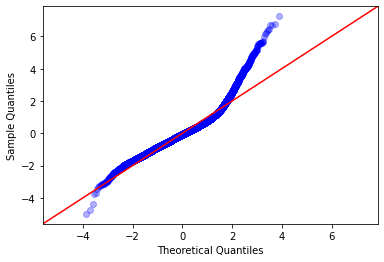

In [152]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

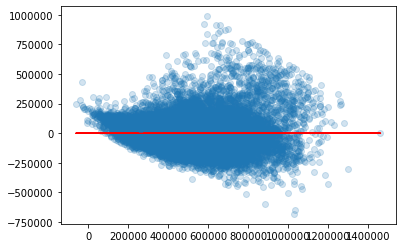

In [153]:
plt.scatter(model.predict(X_int), model.resid, alpha = 0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot(model.predict(X_int), [0 for i in range(len(X_train))], color = 'red')
plt.show()

### Predictive Qualitites
After all these models have been built and their qualities analzyed, I will conclude by looking at forecasting qualities. For this purpose I will load the best performing of the previously saved models.

In [154]:
models = models.sort_values(by = 'R² Adjusted', ascending=False)
models

,Model,Description,No. of features,R²,R² Adjusted,RMSE,RMSE std
6,Multiple Linear Regression,Lognormal,46.0,0.692,0.691,134904.0,3267.0
2,Multiple Linear Regression,one-hot encoding,43.0,0.683,0.682,136640.0,5637.0
4,Multiple Linear Regression,Scaled Features,43.0,0.683,0.682,136640.0,5637.0
7,Multiple Linear Regression,Lognormal RFE,28.0,0.682,0.682,136820.0,3756.0
5,Multiple Linear Regression,RFE,41.0,0.678,0.677,137769.0,5910.0
1,Multiple Linear Regression,without yr_built & quarter,16.0,0.659,0.659,141357.0,5419.0
3,Multiple Linear Regression,one-hot encoding & p-values elim.,24.0,0.619,0.618,149690.0,5927.0
0,Simple Linear Regression,Sqft_living,1.0,0.381,0.381,190204.0,5548.0


In [155]:
model_1_pred, X_train, y_train = pickle.load(open('models/model_log.pkl', 'rb'))
results = model_1_pred.fit(X_train, y_train)

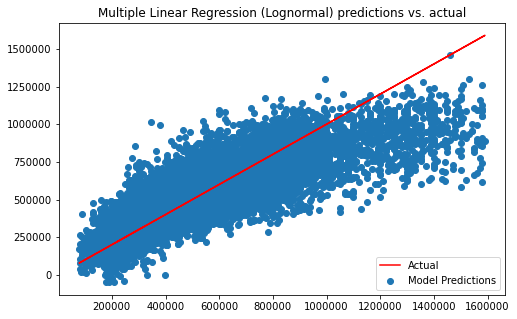

In [156]:
y_pred = model_1_pred.predict(X_train)

plt.figure(figsize=(8, 5))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.scatter(y_train, y_pred, label='Model Predictions')
plt.plot(y_train, y_train, label='Actual', color='red')
plt.title('Multiple Linear Regression (Lognormal) predictions vs. actual')
plt.legend(loc='lower right')
plt.show()

As can be seen from the above visual, the model is not performing well for more expensive houses as it tends to underestimate prices.
It seems that further work would be necessary to improve predictions.

## Conclusion
I have built and tested a total of **8 models**, from simple to linear regression, with and without scaling and lognormalization.

The best model is using lognormal transformation of key variables. It **explains more than 2/3 of the variation in the target variable price**, shows a **small RMSE** and does **not suffer from overfitting**. However, its **predictive qualities begin to suffer as prices become more expensive**.

#### Time
- The effect of time of the year does not seem to have a significant impact on sales prices
- Nevertheless, **spring or the second quarter in general and April in particular** showed the **highest median prices** in the past
- Winter and Q1 has the lowest number of sales and some of the lowest median sales prices in any given month

#### Location
- While the zipcode analysis has by no means been exhaustive, the highest sales prices were achieved in in the following areas:
    1. 98004
    2. 98040
    3. 98033
    4. 98105
    5. 98166
    
- Sales activities should focused on these areas to achieve the highest sales prices

#### Attributes
- Houses with **higher bedroom, bathroom and floor count** are recommendable
- Exceptions apply to the number of floors, which show a **decrease in sales price beyond 2.5 floors** for a given house
- **Basements** as well as performed **renovations** are generally **favorable in terms of price**
- **Grade and condition** show a **positive correlation with price** and seem to be a **good indicator of prices**. In terms of grade I recommend at least a 9, for condition a 3 to focus on, when a high sales price is to be achieved.

### Further Studies

The following are areas of study that could potentially improve results:

- Applying **polynomials**: Deviating from strictly linear models could improve predictive accuracy for cases where residuals are not normally distributed but show positive and negative values at either end
- In-depth **zipcode-analysis**: Zipcodes could be tiered up, providing opportunities to arrange data according to neighbourhoods or more refined geographical locations, therbey adding granularity to the overall analysis
- Further **variations in model refinements**: Different approaches such as lognormal transformation, one-hot encoding, feature scaling could be combined in various ways
- **Advanced regression models**: Going beyond linear or polynomial regression analysis, advanced algorithms could be employed that may shed light on aspects yet not discovered
- **Interaction** analysis: The effect of two variables interacting in a way that is more/less than the sum of their individual parts could distort results and is worthwhile to be explored further